<a href="https://colab.research.google.com/github/Sala0307/AIML-Training/blob/main/PSU_Day_02_ML_paradigms_Ridge%20with%20higher%20alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Agenda**

Learn steps to build a ML model.
Take an example and start building a linear regression model


##**Introduction**

In the world of machine learning — where humans find creative ways for machines to find creative ways to solve problems — few algorithms are as popular as linear regression.

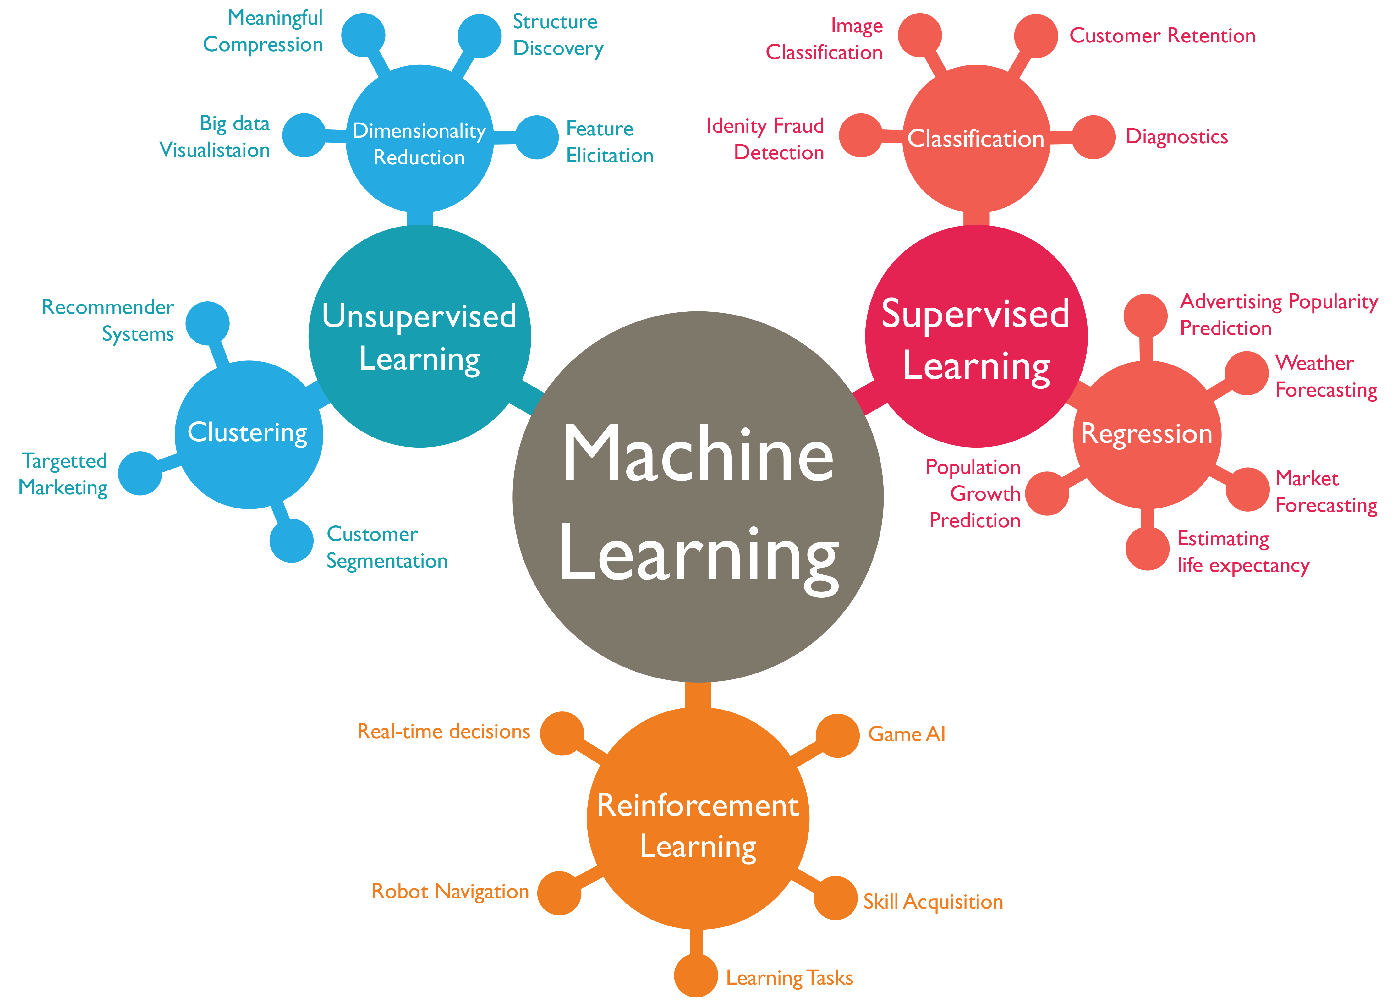


##**10 steps to build and optimize a ML model**

1. Define the Objective
2. Data Gathering
1. Data Cleaning
1. Exploratory Data Analysis (EDA)
1. Feature Engineering
1. Feature Selection
1. Model Building
1. Model Evaluation
1. Model Optimization
1. Conclusion








##**How to define an objective?**

An objective should be clear and precise. Therefore, to define a clear objective we need to follow few steps like:

1. Understand the business (Eg: Real Estate Sales)
1. Identify the problem (Eg: Estimate the Price of House)
1. List out all the possible solutions to solve the problem (Eg: Take land size into consideration, total build area, number of bedrooms, bathrooms, etc.; go through previous sales data)
1. Decide on one solution (Eg. Let's take linear regression)

By following the above steps, we’ve clearly defined that the objective is to build a model to manage inventory in order to increase store profits.

##**What’s Data Gathering? When do we gather data? Why is Data Gathering necessary?**

Data Gathering is nothing but collecting the data required as per the defined objective.

Once the objective is defined, we will collect data.

Without past data, we cannot predict the future, hence Data Gathering is necessary. In general a dataset is created by gathering data from various resources based on the objective. One of the reasons for gathering data from multiple resources is to get more accurate results i.e.,”The more the data, the more accurate the results will be”.

##**How is Data Gathering done?**
Data can be collected in one of the following ways mentioned below:
1. API’s (like Google, Amazon, Twitter, New York Times etc.)
1. Databases (like AWS, GCP etc.)
1. Open source (Kaggle/UCI Machine Learning Repositories etc.)
1. Web Scraping (Not recommended, as often it is considered as illegal)

**To make this example concrete, we’ll use a popular real-world data set of housing prices from King County, WA, which includes homes sold between May 2014 and May 2015.**

You can access the data set [here](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/) (I've taken the original [Kaggle data](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) set to make it easier to examine the data). I'll be running Python code on Google Colab, which I highly recommend (you can set up a Python notebook on your browser with one click).


## The goal is to predict the sales price for each house based on the given features.

Importing the necessary libraries and dataset

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline

* Pandas: a library for manipulating tabular data (e.g. data in rows and columns)
* NumPy: a library that helps perform mathematical functions on arrays
* Matplotlib: a library for creating plots and visualizations
* Seaborn: a data visualization library that builds on top of matplotlib to offer a wider variety of visualizations (I often prefer seaborn plots over matplotlib plots)

functions which are used repeatatively

In [12]:
#Function to plot histogram of price
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()

In [13]:
def printStatistics(df1,df2):
    mse=mean_squared_error(df1,(df2))
    print("Mean squared error:"+ str(mse))
    rmse = np.sqrt(mean_squared_error(df1,(df2)))
    print("Root mean squared logarithmic error: "+ str(rmse))
    r_squared = r2_score(df1,df2)
    print("R-squared value: "+ str(r_squared))
    plt.figure(figsize=(10, 6))
    sns.regplot(x=df2,y=df1)

## **Data Cleaning**

**What’s Data Cleaning?**

Data cleaning is the process of removing, modifying or formatting data that is incorrect, irrelevant or duplicated.

**How to do Data Cleaning?**
We use libraries like Pandas, Numpy to do Data Cleaning and apply the following key steps to determine if we need to clean the dataset.

1. Check how many rows and columns are in the dataset.
1. Look for duplicate features by going through the meta info provided.
1. Identify Numerical and Categorical features in the gathered data and check if formatting is required or not.

In [14]:
#### for suppressing scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_data = pd.read_csv('/content/kc_house_data.csv')

In [15]:
train_data.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.000         3      1.000         1180   
1  6414100192  20141209T000000 538000.000         3      2.250         2570   
2  5631500400  20150225T000000 180000.000         2      1.000          770   
3  2487200875  20141209T000000 604000.000         4      3.000         1960   
4  1954400510  20150218T000000 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000           0     0  ...      7        1180              0   
1      7242   2.000           0     0  ...      7        2170            400   
2     10000   1.000           0     0  ...      6         770              0   
3      5000   1.000           0     0  ...      7        1050            910   
4      8080   1.000           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.511 -122.257           1340        5650  
1      1951          1991    98125 47.721 -122.319           1690        7639  
2      1933             0    98028 47.738 -122.233           2720        8062  
3      1965             0    98136 47.521 -122.393           1360        5000  
4      1987             0    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

In [16]:
train_data.shape

(21613, 21)

In [9]:
train_data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

### The dataset has 16000 rows but the number of unique ids are 15887 so, checking for duplicates

In [17]:
train_data.duplicated().sum()

0

In [18]:
IDCount = train_data.groupby('id')['yr_built','zipcode'].count()
IDCount[0:10]

yr_built  zipcode
id                        
1000102         2        2
1200019         1        1
1200021         1        1
2800031         1        1
3600057         1        1
3600072         1        1
3800008         1        1
5200087         1        1
6200017         1        1
7200080         1        1

In [19]:
train_data.loc[train_data['id'] == 1000102]

id             date      price  bedrooms  bathrooms  sqft_living  \
2496  1000102  20140916T000000 280000.000         6      3.000         2400   
2497  1000102  20150422T000000 300000.000         6      3.000         2400   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2496      9373   2.000           0     0  ...      7        2400   
2497      9373   2.000           0     0  ...      7        2400   

      sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
2496              0      1991             0    98002 47.326 -122.214   
2497              0      1991             0    98002 47.326 -122.214   

      sqft_living15  sqft_lot15  
2496           2060        7316  
2497           2060        7316  

[2 rows x 21 columns]

In [20]:
train_data.loc[train_data['id'] == 7200179]

id             date      price  bedrooms  bathrooms  sqft_living  \
16814  7200179  20141016T000000 150000.000         2      1.000          840   
16815  7200179  20150424T000000 175000.000         2      1.000          840   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
16814     12750   1.000           0     0  ...      6         840   
16815     12750   1.000           0     0  ...      6         840   

       sqft_basement  yr_built  yr_renovated  zipcode    lat     long  \
16814              0      1925             0    98055 47.484 -122.211   
16815              0      1925             0    98055 47.484 -122.211   

       sqft_living15  sqft_lot15  
16814           1480        6969  
16815           1480        6969  

[2 rows x 21 columns]

#### Hence, it is clear that the few number of homes are sold multiple time
In next step I will check if there are any missing values in dataset

In [21]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### There are no missing values in data, if there are missing values I will remove those rows from dataset

In [22]:
train_data = train_data.dropna()

In [23]:
train_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Now the dataset is pretty clean
In next step I will look into datatypes of columns

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## **Exploratory Data Analysis (EDA)**

In simple terms, EDA is nothing but understanding and analyzing the data by using various Statistical Measures (like mean, median) and Visualization Techniques(like Univariate Analysis, Bivariate Analysis etc.).

**How to perform EDA?**
There are Python libraries like Pandas, Numpy, Statsmodels, Matplotlib, Seaborn, Plotly etc, to perform Exploratory Data Analysis.
While doing EDA, some of the basic common questions we ask are:

1. What are the independent and dependent features/labels in the collected data?
1. Is the selected label/dependent feature Categorical or Numerical?
1. Are there any missing values in the features/variables?
1. What are the summary statistics (like mean etc.) for Numerical features?
1. What are the summary statistics (like mode etc.) for Categorical features?
1. Are the features/variables normally distributed or skewed?
1. Are there any outliers in the features/variables?
1. Which independent features are correlated with the dependent feature?
1. Is there any correlation between the independent features? >So, we will try to understand the data by finding answers to the above questions both Visually (by plotting graphs) and Statistically (hypothesis testing like normality tests).

It is often said Data is only as good as it is presented. Countless studies show how our brain is wired for the visual, and processes everything faster when it is through the eye. Therefore it becomes increasingly important to be able to APPRECIATE, INTERPRET and VISUALIZE data even before we start writing any form of code to process it.

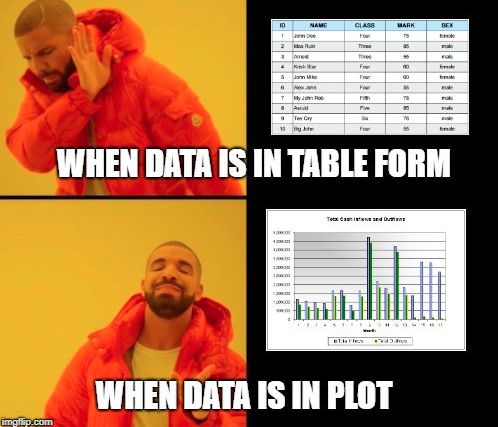

In [25]:
train_data.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21613.000   21613.000 21613.000  21613.000    21613.000   
mean  4580301520.865  540088.142     3.371      2.115     2079.900   
std   2876565571.312  367127.196     0.930      0.770      918.441   
min      1000102.000   75000.000     0.000      0.000      290.000   
25%   2123049194.000  321950.000     3.000      1.750     1427.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900445.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21613.000 21613.000   21613.000 21613.000  21613.000 21613.000   
mean    15106.968     1.494       0.008     0.234      3.409     7.657   
std     41420.512     0.540       0.087     0.766      0.651     1.175   
min       520.000     1.000       0.000     0.000      1.000     1.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10688.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21613.000      21613.000 21613.000     21613.000 21613.000 21613.000   
mean     1788.391        291.509  1971.005        84.402 98077.940    47.560   
std       828.091        442.575    29.373       401.679    53.505     0.139   
min       290.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1190.000          0.000  1951.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2210.000        560.000  1997.000         0.000 98118.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21613.000      21613.000   21613.000  
mean   -122.214       1986.552   12768.456  
std       0.141        685.391   27304.180  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000

<Axes: xlabel='bedrooms', ylabel='price'>

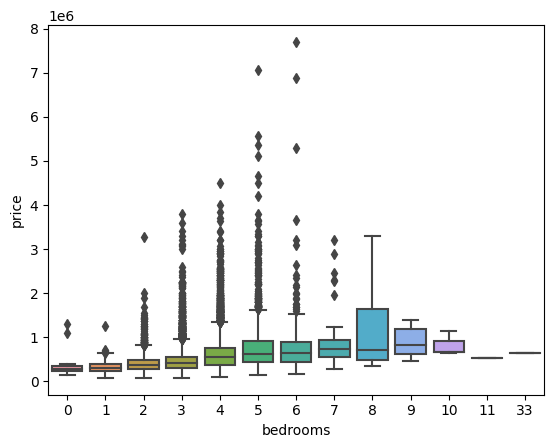

In [26]:
sns.boxplot(x= train_data['bedrooms'], y=train_data['price'])

<Axes: xlabel='bathrooms', ylabel='price'>

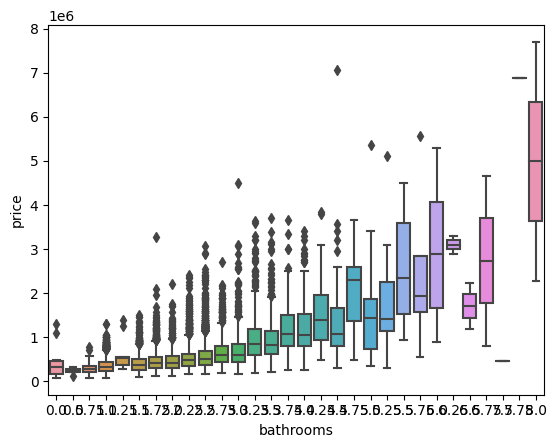

In [27]:
sns.boxplot(x= train_data['bathrooms'], y=train_data['price'])

<Axes: xlabel='grade', ylabel='bathrooms'>

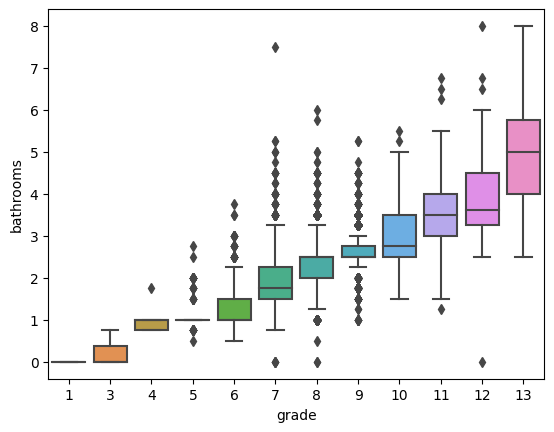

In [28]:
sns.boxplot(x= train_data['grade'], y=train_data['bathrooms'])

**From above statistics we can analyse the dataset**
1.  Average price of house sold in King County is $540088.

2.  We can observe that there are very few houses which have some features and price appear far from others like 33                bedrooms or price $7700000
3.  There will always be some outliers as some luxury house prices in this dataset I did normalisation in next step to reduce       the effect of outliers
4.  The sqft_living column has maximum value of 13540 sqft, which is 3 standard deviations above mean. This can be the             case if house is luxury but  to reduce the effect I did normalisation of this column as well
5.  Avg no. of 3 bedrooms and 2 bathrooms per house were sold in King County
6.  Avg area of house is 2079 Sqft with one house having 13540 Sqft. area
7. The dataset contains houses built from year 1900 to 2015

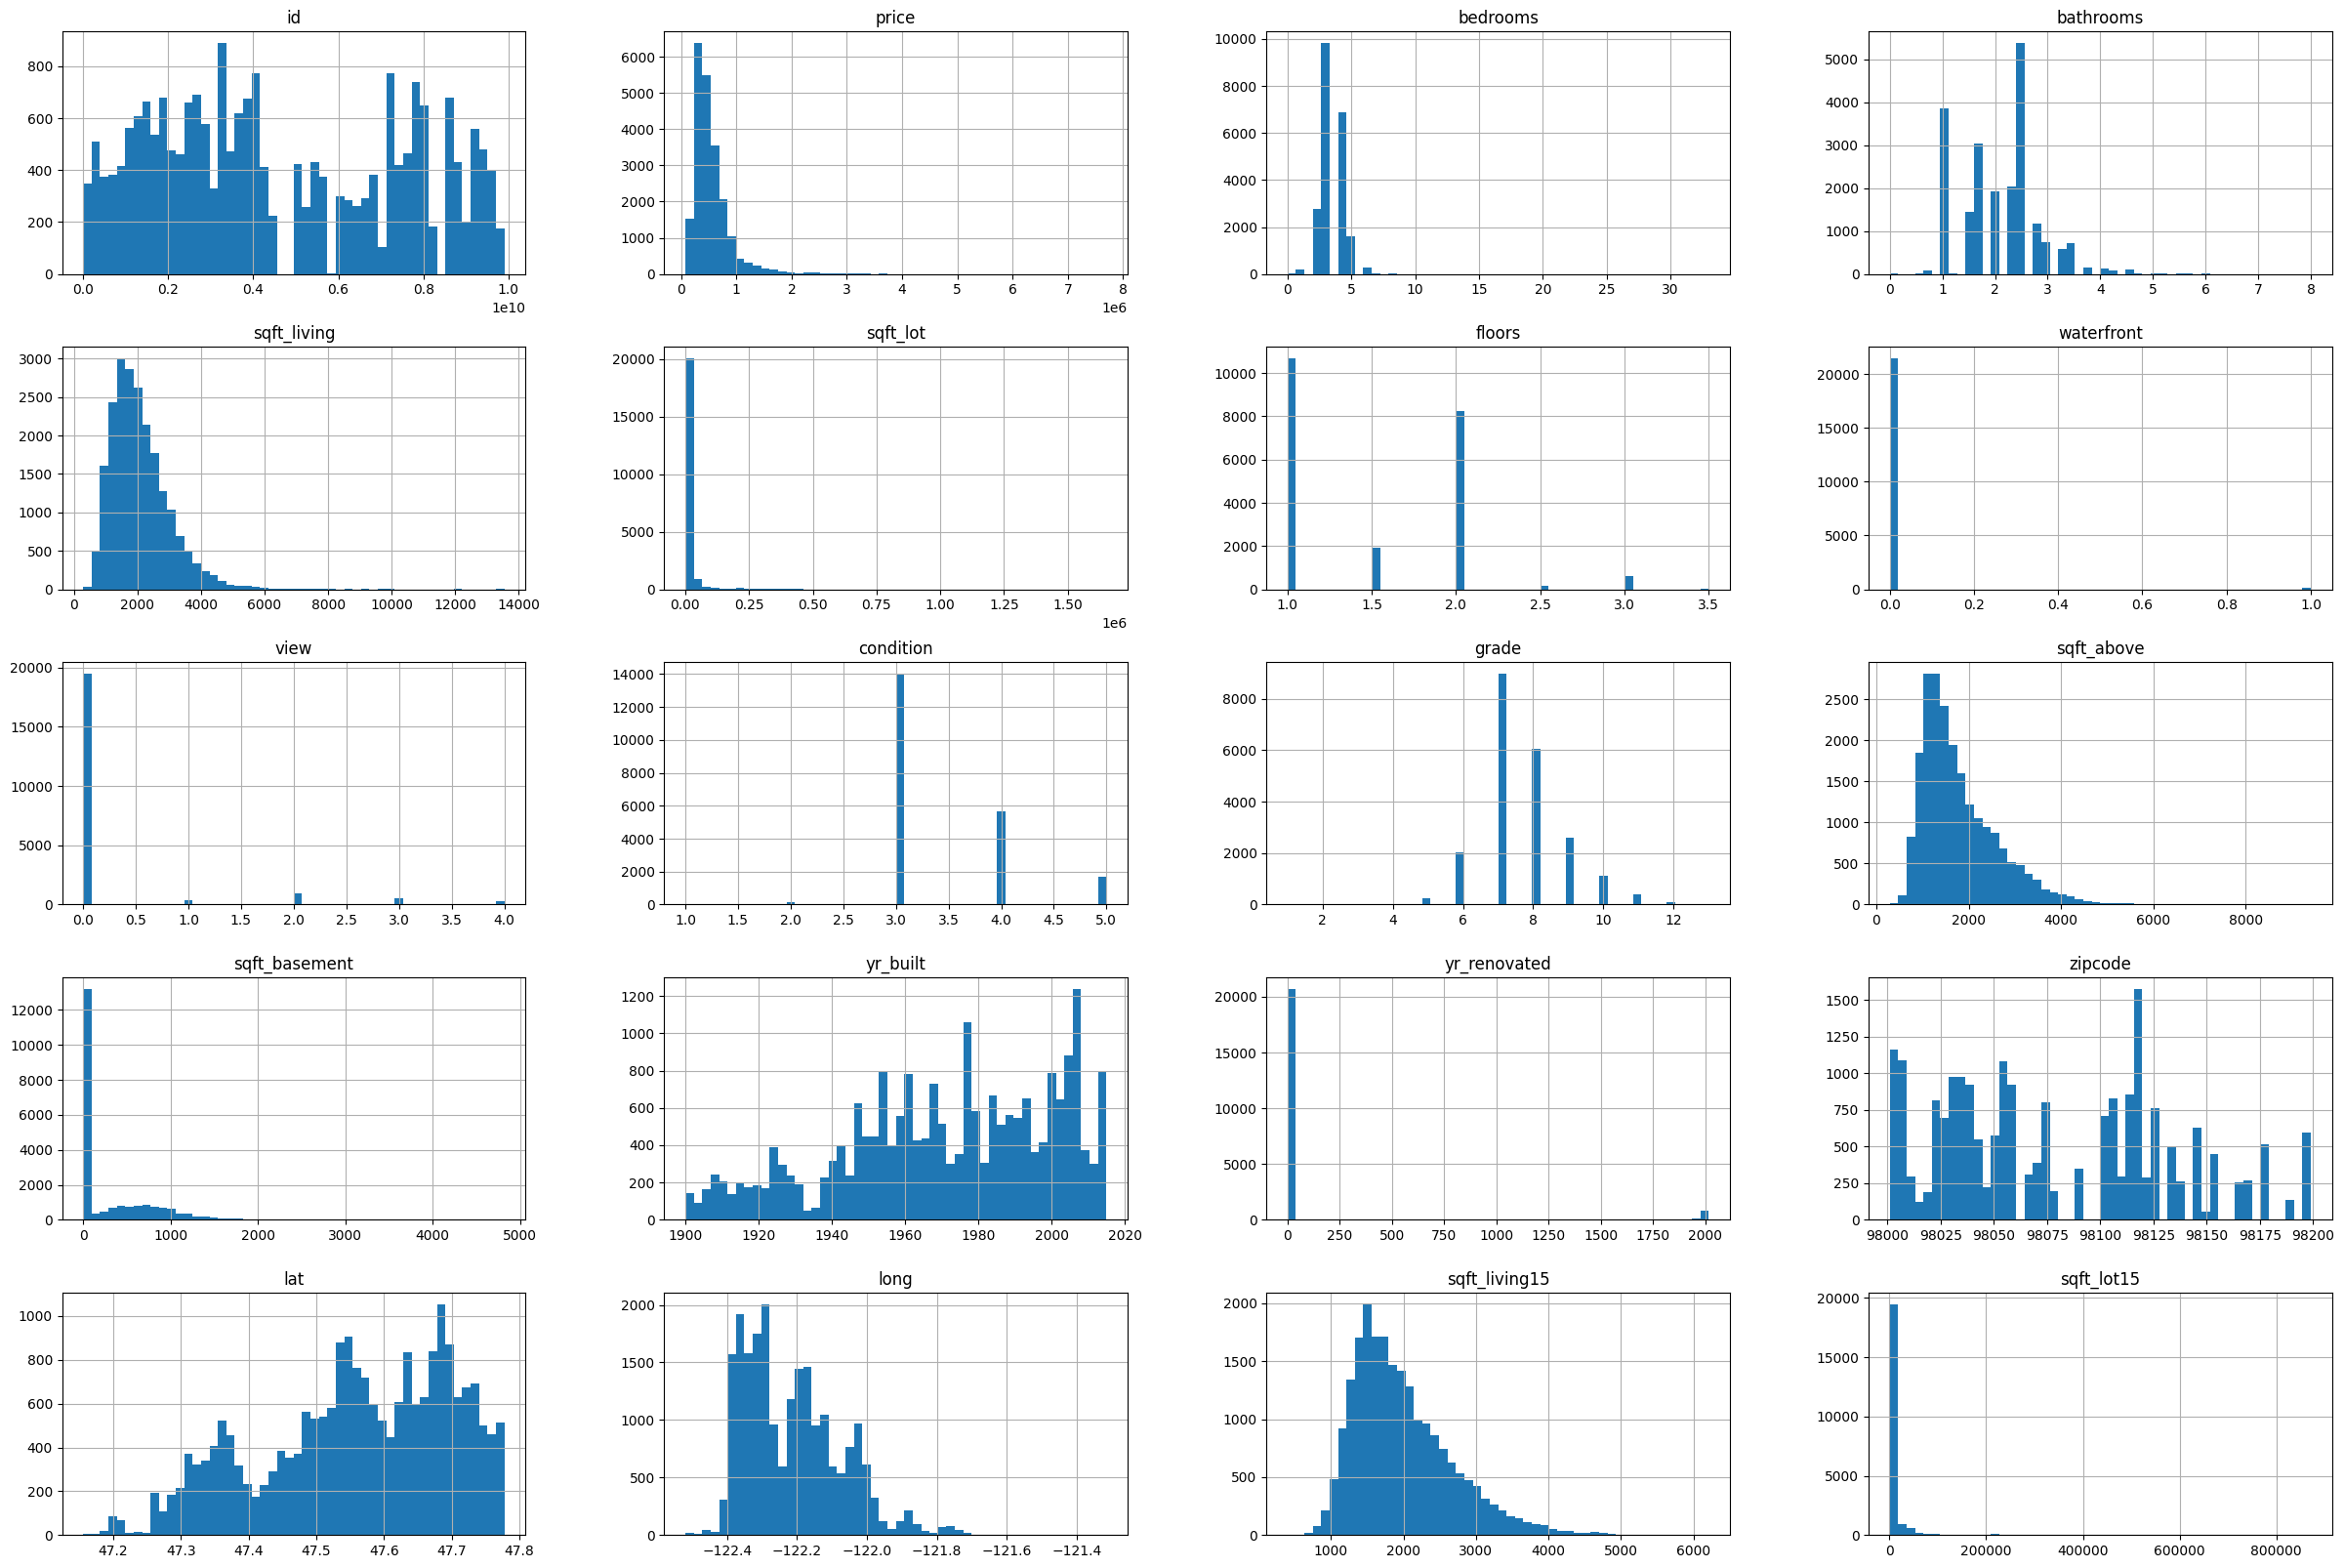

In [29]:
# Plot the histograms of each
train_data.hist(bins=50, figsize=(30,20))
plt.show()

## **Conclusions from above histrograms**
1] Most of the houses in the dataset have 3 bedrooms
2] Most of the houses have condition 3 and have only 1 floor
3] Most of the houses have grade=7
4] The histograms of Price and sqft_living are right-skewed.

## **Data preprocessing**
The price and sqft_living has appreciable positive skewness, deviates from the normal distribution. Log transormation to make the scale numeric

Text(0.5, 0, 'price')

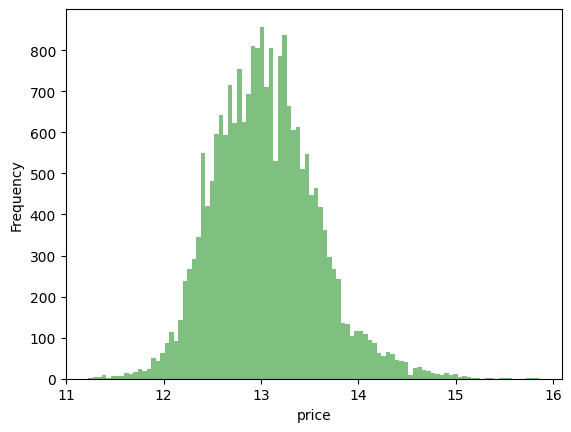

In [30]:
train_data.price = np.log(train_data.price)
DrawHistogram(train_data.price)
plt.xlabel('price')

In [31]:
train_data.price.describe()

count   21613.000
mean       13.048
std         0.527
min        11.225
25%        12.682
50%        13.017
75%        13.377
max        15.857
Name: price, dtype: float64

### Computing new columns

### Calculating the age of house by taking the difference between year_sold and year_built

In [32]:
train_data['year_sold'] = train_data['date'].apply(lambda x: int(x[:4]))

In [33]:
train_data['house_age'] = train_data[['year_sold']].sub(train_data['yr_built'], axis=0)

### The yr_renovated has no significance because we can not tell wheter it is renovated or not so I will create a column which will have value 0 for no renovation and 1 for renovated house.

In [34]:
train_data['is_renovated'] = train_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

### Remove the columns date,yr_built as we have used them to calculate new column

In [35]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
train_data.drop(["yr_built", "yr_renovated","date","year_sold"], axis = 1, inplace = True)

KeyError: ignored

###**Heat Map**
Now there are 20 columns in our dataset so we have to select those important features only which have high impact on price.

**Correlation and the Pearson's correlation coefficient**
Correlation is the relationship between two variables, and the strength of this relationship is called the Pearson’s correlation coefficient, Pearson’s r, or just r for short.

The correlation coefficient can take any value from -1 to 1.

* r = 1 means that two variables are perfectly correlated (a positive change in one variable perfectly predicts a positive change in the other)
* r = 0 means that two variables are not correlated (a change in one variable does not predict a change in the other)
* r = -1 means that two variables are negatively correlated (a positive change in one variable perfectly predicts a negative change in the other)

A heatmap shows the relative intensity of a value within an array. This means that we have a large amount of numbers, and each is given a graphical representation. Those that are highest in their value – relative to the other present numbers – will be given a “hot” color, while those that are lower in their value

<Axes: >

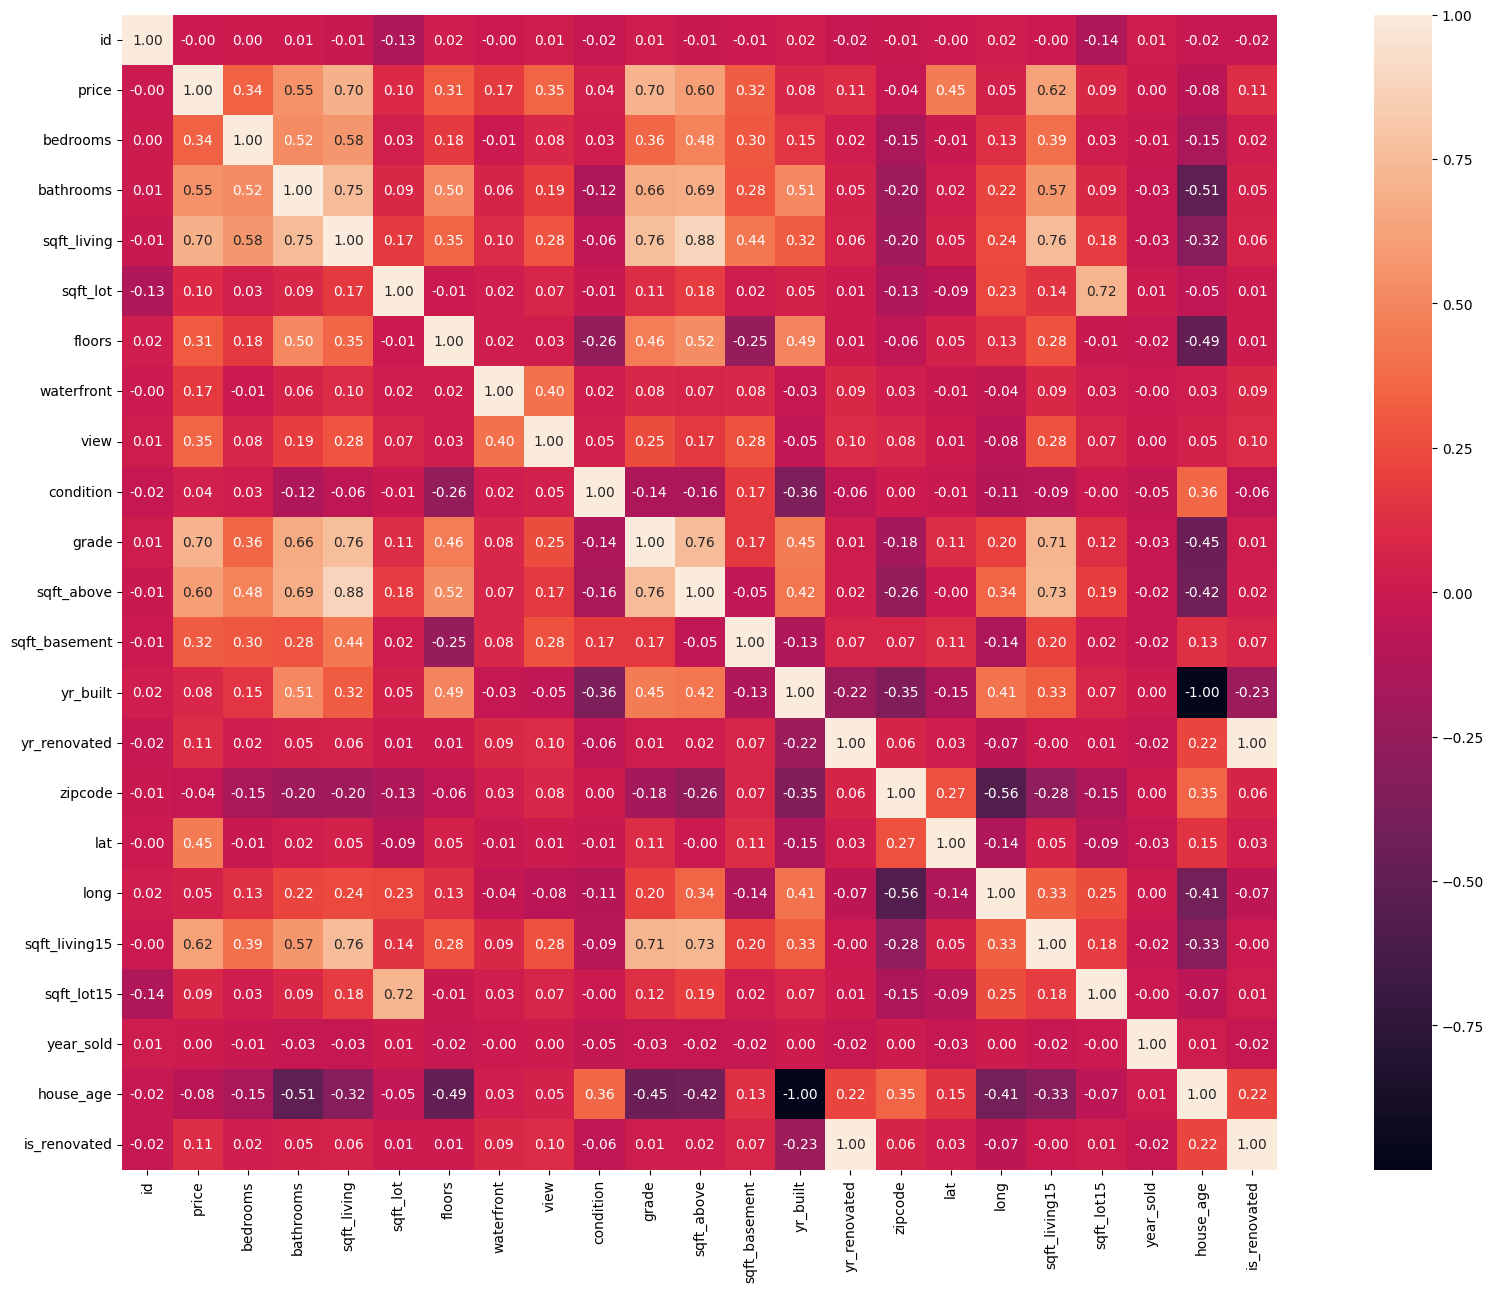

In [36]:
#price correlation matrix
corrmat =train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
# sns.color_palette("viridis", as_cmap=True)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

##  **Feature Engineering**
A feature refers to a column in a dataset, while engineering can be manipulating, transforming, or constructing, together they’re known as Feature Engineering. Simply put, Feature Engineering is nothing but transforming existing features or constructing new features.


**Why is Feature Engineering necessary?**

Feature Engineering transforms the raw data/features into features which are suitable for machine learning algorithms. This step is necessary because feature engineering further helps in improving machine learning model’s performance and accuracy.

**How to do Feature Engineering?**

We use libraries like Pandas, Numpy, Scikit-learn to do Feature Engineering. Feature Engineering techniques include:

1. Handling Missing Values
1. Handling Skewness
1. Treating Outliers
1. Encoding
1. Handling Imbalanced data
1. Scaling down the features
1. Creating new features from the existing features

In [37]:
train_data.shape

(21613, 24)

### Converting zipcodes into categories

In [36]:
train_data = pd.get_dummies(train_data,columns=['zipcode'])

KeyError: ignored

### printing correlation values of each coefficient with respect to price

In [38]:
corr_matrix = train_data.corr()
cor_target=abs(corr_matrix["price"]).sort_values(ascending=False)
cor_target

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
lat             0.449
view            0.347
bedrooms        0.344
sqft_basement   0.317
floors          0.311
waterfront      0.175
yr_renovated    0.114
is_renovated    0.114
sqft_lot        0.100
sqft_lot15      0.092
yr_built        0.081
house_age       0.081
long            0.050
condition       0.040
zipcode         0.038
year_sold       0.005
id              0.004
Name: price, dtype: float64

### As we can see the correlation value for grade, sqft_living,sqft_living15, sqft_above ,bathrooms, lat ,view,          bedrooms, floors are above 0.3 and other features have much less coefficients. So now I will try to visualize whether the correlation values above reflects the same.

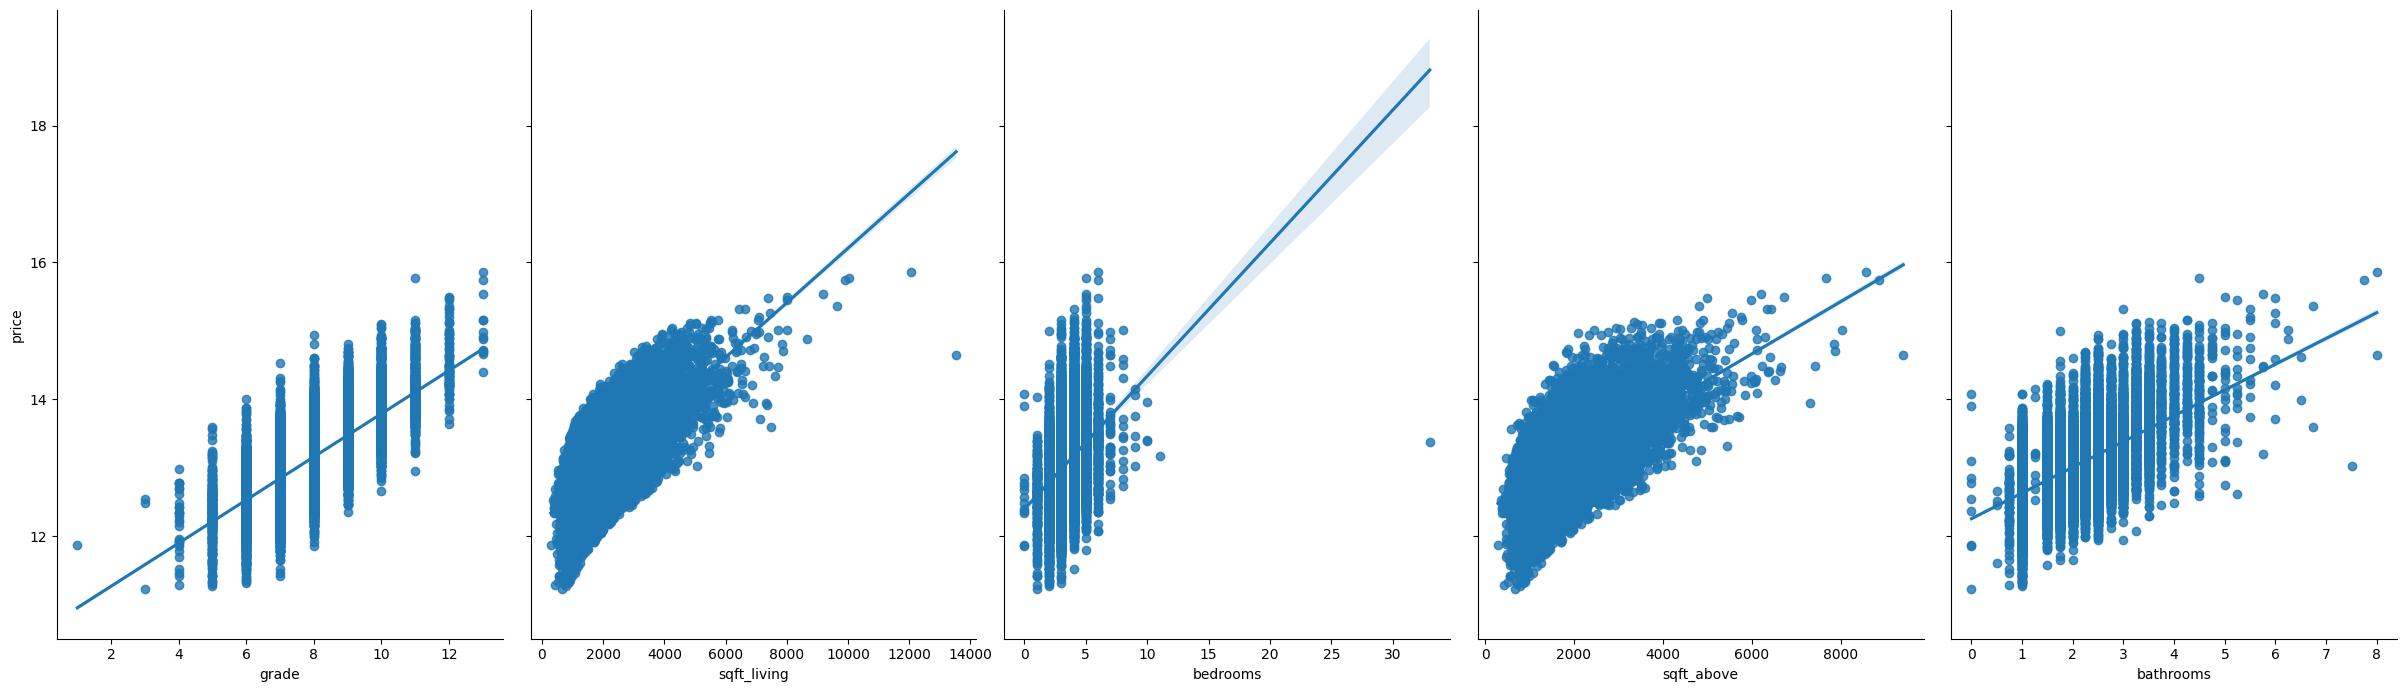

In [39]:
sns.pairplot(train_data, x_vars=['grade','sqft_living','bedrooms','sqft_above','bathrooms'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear that with sqft_living, grade, bedrooms, bathrooms, sqft_above features price of houses increases significantly

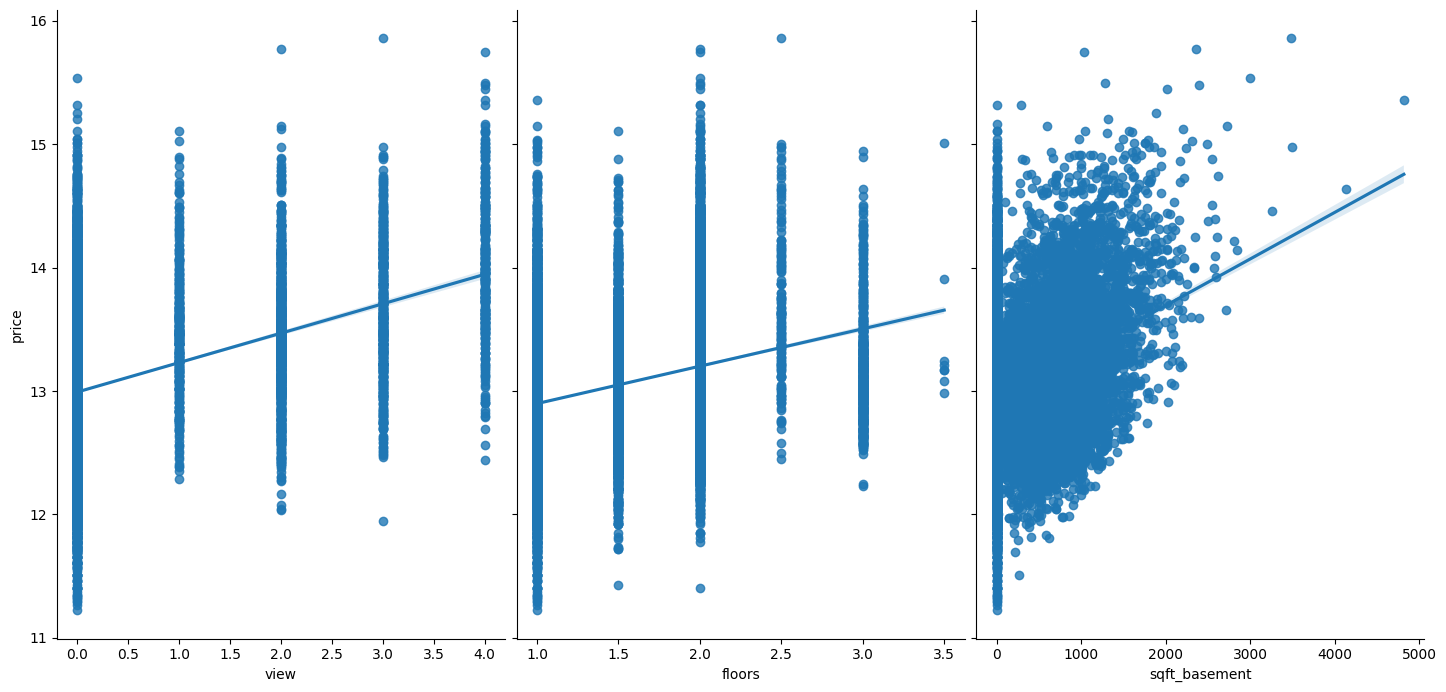

In [40]:
sns.pairplot(train_data, x_vars=['view','floors','sqft_basement'], y_vars='price', size=7, aspect=0.7, kind='reg')


### The visualisation makes it clear with  view, floors, sqft_basement features price of houses shows slight increase but not as significant as above features

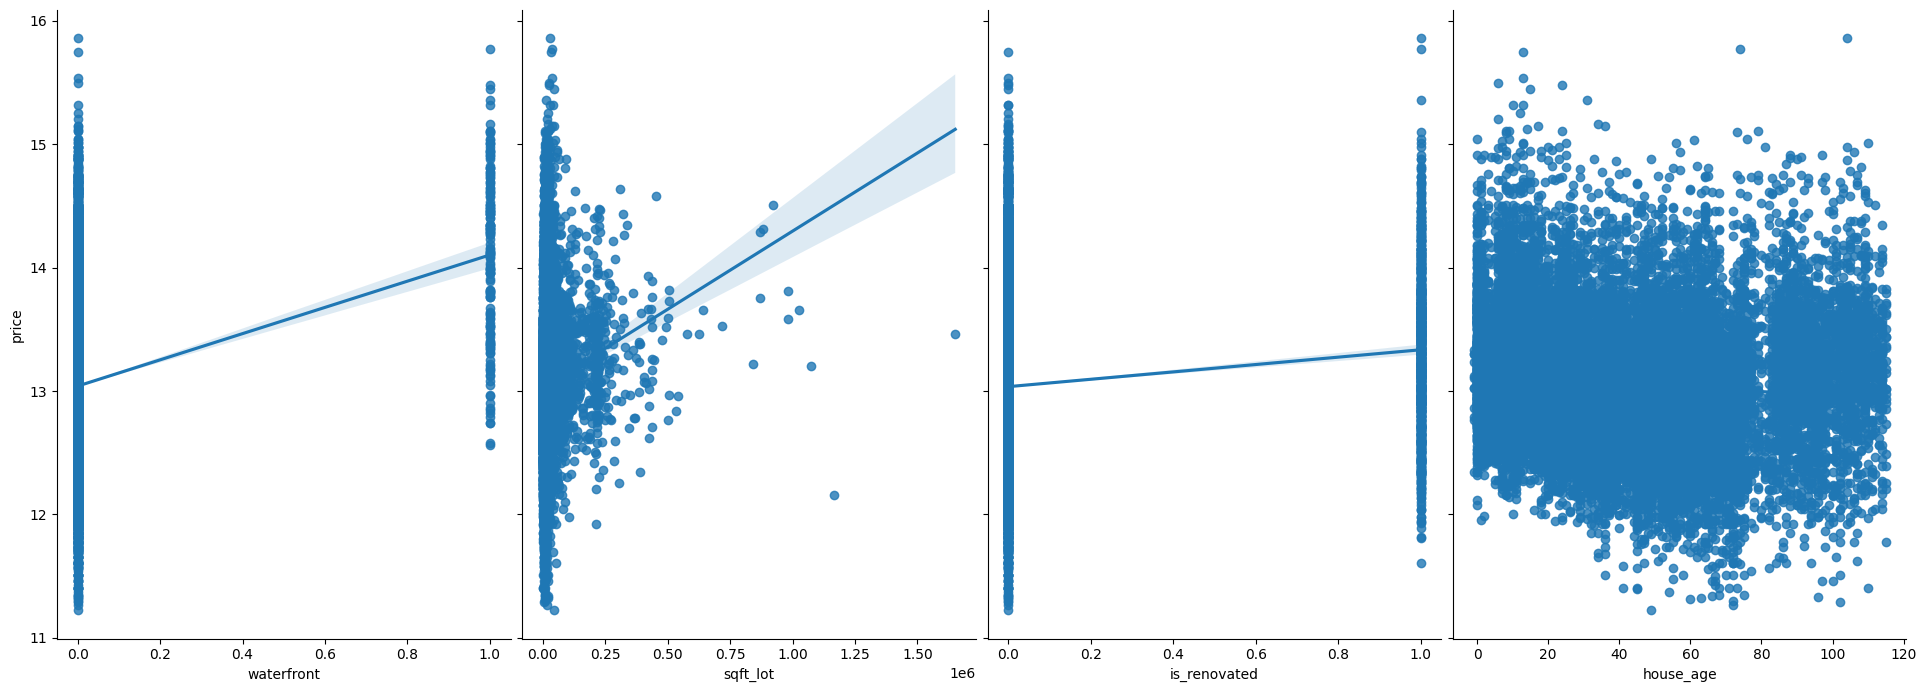

In [41]:
sns.pairplot(train_data, x_vars=['waterfront','sqft_lot','is_renovated','house_age'], y_vars='price', size=7, aspect=0.7, kind='reg')

### Surprisingly, age of house or whether it is renovated or not does not affect the price of house much.
#### Now I will keep only those features whose value is greater than 0.5.
#### One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.
#### So, I will exclude sqft_living15 because it is highly correlated with sqft_living(0.76).

In [42]:
#Selecting highly correlated features
relevant_features1 = cor_target[cor_target>0.5]
relevant_features1

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
Name: price, dtype: float64

In [43]:
main_features1 = ['grade','sqft_living','sqft_above','bathrooms']
X1 = train_data[main_features1]
y1 = train_data.price

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)

#**Regression**



## **Why do modelling relationships matter?**

By now, hopefully you subscribe to the idea that relationships really matter in data science (also in real life, but let's stick to data science for now). By building models of relationships, we can make predictions about data that we're interested in.

## Model Implementation

### 1] Simple linear regression

In [45]:
#Initialize Linear Regression variable
LinearRegression1 = linear_model.LinearRegression()
LinearRegression1.fit(X_train1,y_train1)

LinearRegression()

**How do we describe how well our linear model fits the data?**

 One way to think about accuracy is to think about error. The difference between the predicted value and the actual value is called the residual, and can be visualized as follows:



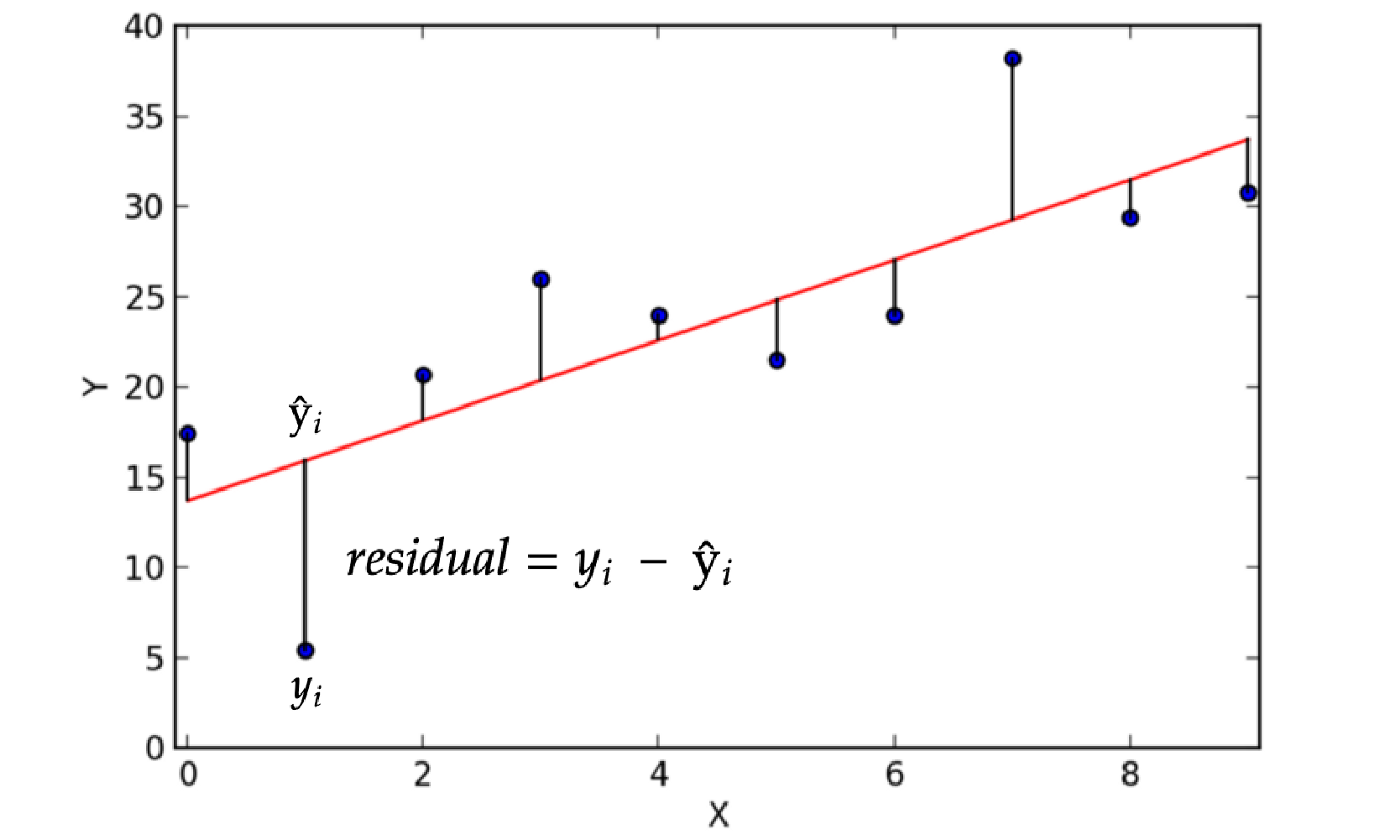

Mean squared error:0.11605607998788954
Root mean squared logarithmic error: 0.3406700456275684
R-squared value: 0.5662522910862371


'Accuracy: 57%'

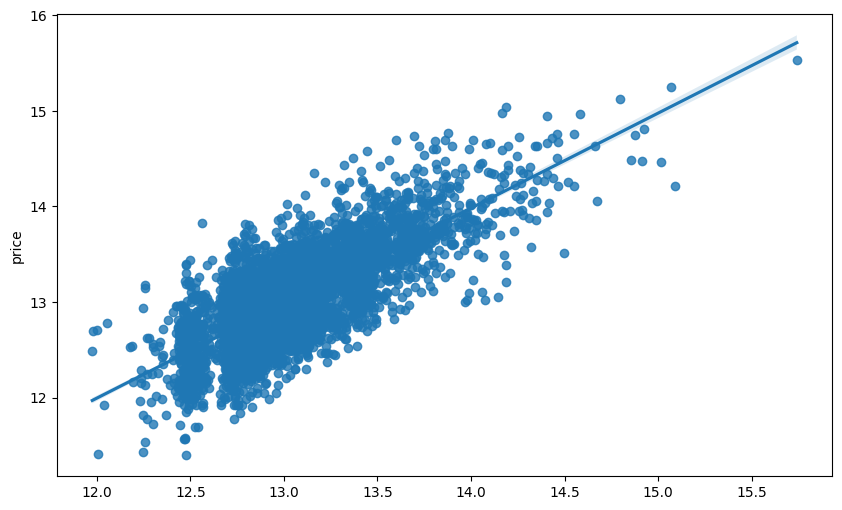

In [46]:
predictions1 = LinearRegression1.predict(X_test1)
printStatistics(y_test1,predictions1)
accuracy = LinearRegression1.score(X_test1, y_test1)
"Accuracy: {}%".format(int(round(accuracy * 100)))

In [48]:
scores = cross_val_score( LinearRegression1, X1, y1, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.5625474954331977


### The previous model has R squared very low it is because I have used less features to predict the price.
### Now I will include more features to increase the R squared value by  selecting features which have
### correlation coefficient>0.2

In [47]:
#Selecting highly correlated features
relevant_features2 = cor_target[cor_target>0.2]
relevant_features2

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
lat             0.449
view            0.347
bedrooms        0.344
sqft_basement   0.317
floors          0.311
Name: price, dtype: float64

In [50]:
main_features2 = ['grade','sqft_living','sqft_living15','sqft_above','bathrooms','view','lat','bedrooms',
                  'sqft_basement','waterfront','floors']
X2 = train_data[main_features2]
y2 = train_data.price

In [51]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

#### I will check the best possible features to train the model by using recursive feature elimination.
#### It uses accuracy metric to rank the feature according to their importance.
#### The RFE method takes the model to be used and the number of required features as input.

### Recursive feature elimination

In [52]:
#no of features
nof_list=np.arange(1,12)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model, step = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train2,y_train2)
    X_test_rfe = rfe.transform(X_test2)
    model.fit(X_train_rfe,y_train2)
    score = model.score(X_test_rfe,y_test2)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.696102


In [53]:
cols = list(X_train2.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, step = 11)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)
#Fitting the data to model
model.fit(X_rfe,y2)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['grade', 'view', 'lat', 'waterfront', 'floors'], dtype='object')


In [57]:
main_features3 = ['grade', 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'lat',
       'bedrooms', 'sqft_basement', 'waterfront', 'floors']
X3 = train_data[main_features3]
y3 = train_data.price

In [58]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)

###  2] Complex Linear Regression(with more features)

In [8]:
#Initialize Linear Regression variable
LinearRegression2 = linear_model.LinearRegression()
LinearRegression2.fit(X_train3,y_train3)


NameError: ignored

Mean squared error:0.06799602361881739
Root mean squared logarithmic error: 0.2607604717337683
R-squared value: 0.7458718279732888


'Accuracy: 75%'

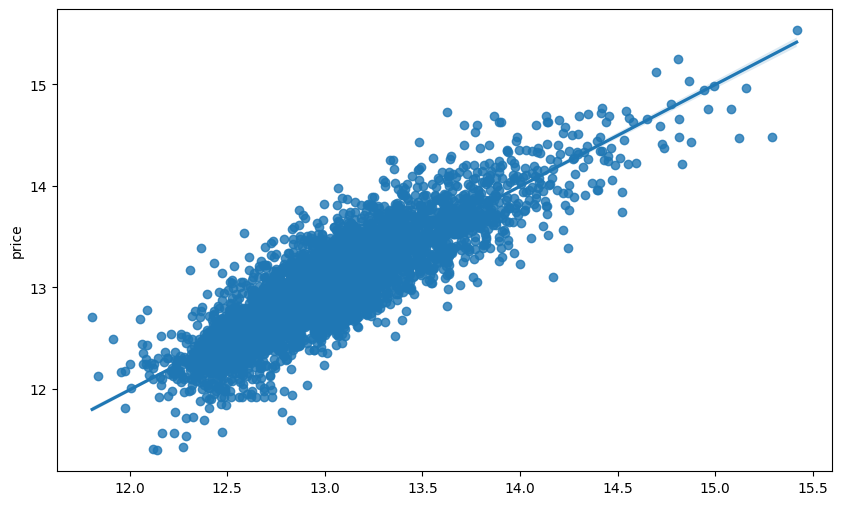

In [57]:
predictions2 = LinearRegression2.predict(X_test3)
printStatistics(y_test3,predictions2)
accuracy = LinearRegression2.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Cross Validation
Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

these values have been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

In [7]:
scores = cross_val_score( LinearRegression2, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

NameError: ignored

## 3] Ridge regression

Mean squared error:0.07144629258922924
Root mean squared logarithmic error: 0.2672943931122186
R-squared value: 0.7329768011792719
Accuracy: 73%


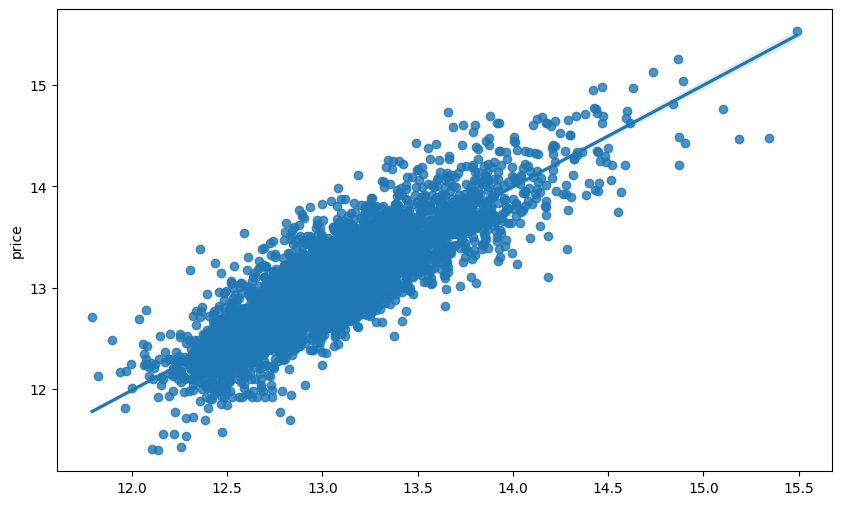

In [59]:
# Normalize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_test_scaled = scaler.transform(X_test3)

# Create and fit the Ridge regression model
ridgeReg = Ridge(alpha=4)
ridgeReg.fit(X_train_scaled, y_train3)

# Make predictions on the test data
predictions3 = ridgeReg.predict(X_test_scaled)

# Evaluate the model
printStatistics(y_test3, predictions3)
accuracy = ridgeReg.score(X_test_scaled, y_test3)
print("Accuracy: {}%".format(int(round(accuracy * 100))))

In [60]:
scores = cross_val_score( ridgeReg, X3, y3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.7427088269478852


## 4] polynomial regression

In [60]:
from sklearn.preprocessing import PolynomialFeatures
# Quadratic
poly = PolynomialFeatures(degree=1)
X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.fit_transform(X_test3)
QuadraticPolynomial = LinearRegression2.fit(X_train4, y_train3)
predictions4 = QuadraticPolynomial.predict(X_test4)
printStatistics(y_test3,predictions4)
accuracy = QuadraticPolynomial.score(X_test4, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

NameError: ignored

In [1]:
predictions4

NameError: ignored

In [ ]:
scores = cross_val_score(QuadraticPolynomial, X_train4, y_train3, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.77023249960314


### 5]  Lasso Regression

Mean squared error:0.1402784948104043
Root mean squared logarithmic error: 0.37453770812884024
R-squared value: 0.4757234972934353


'Accuracy: 48%'

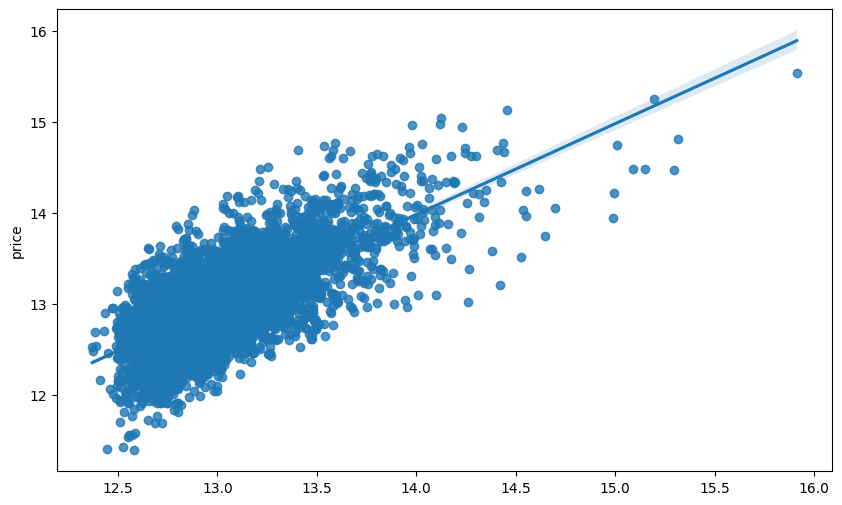

In [77]:
lasso = Lasso(alpha=0.5)
lassoModel=lasso.fit(X_train3,y_train3)
predictions_lasso = lassoModel.predict(X_test3)
printStatistics(y_test3,predictions_lasso)
accuracy = lassoModel.score(X_test3, y_test3)
"Accuracy: {}%".format(int(round(accuracy * 100)))

### Models with all features

In [66]:
X_whole_features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

In [68]:
X_whole = train_data[X_whole_features]
y_whole = train_data.price

In [69]:
import statsmodels.api as sm
#Backward Elimination
cols = list(X_whole.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X_whole[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_whole,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'z

In [70]:
X_whole_features1=['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                   'sqft_basement', 'lat', 'long', 'sqft_living15', 'house_age', 'is_renovated', 'zipcode_98001',
                   'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
                   'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
                   'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
                   'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98040',
                   'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
                   'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
                   'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
                   'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
                   'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
                   'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
                   'zipcode_98155','zipcode_98166', 'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
                   'zipcode_98198', 'zipcode_98199']

In [71]:
X_whole = train_data[X_whole_features1]
y_whole = train_data.price

In [72]:
X_train_whole, X_test_whole, y_train_whole, y_test_whole = train_test_split(X_whole, y_whole, test_size=0.20, random_state=0)

### 6] Rigde regression with more features

Mean squared error:0.03310289568866097
Root mean squared logarithmic error: 0.18194201188472378
R-squared value: 0.8762813187825552
Accuracy: 88%


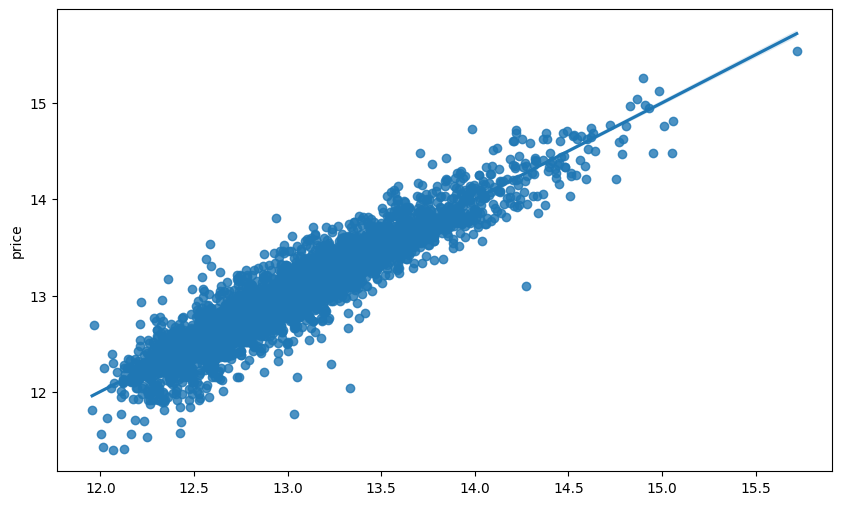

In [ ]:
# Normalize the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_whole)
X_test_scaled = scaler.transform(X_test_whole)

# Create and fit the Ridge regression model
ridgeReg2 = Ridge(alpha=1)
ridgeReg2.fit(X_train_scaled, y_train_whole)

# Make predictions on the test data
predictions_whole = ridgeReg2.predict(X_test_scaled)

# Evaluate the model
printStatistics(y_test_whole, predictions_whole)
accuracy = ridgeReg2.score(X_test_scaled, y_test_whole)
print("Accuracy: {}%".format(int(round(accuracy * 100))))

In [ ]:
scores = cross_val_score(ridgeReg2, X_whole, y_whole, cv=10)
print("The avergae accuracy with 10 fold cross validation is: ", scores.mean())

The avergae accuracy with 10 fold cross validation is:  0.8735923012961282


### 7] Lasso Model with more features
The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Mean squared error:0.13372194502428772
Root mean squared logarithmic error: 0.3656801129734672
R-squared value: 0.5002279303951207


'Accuracy: 50%'

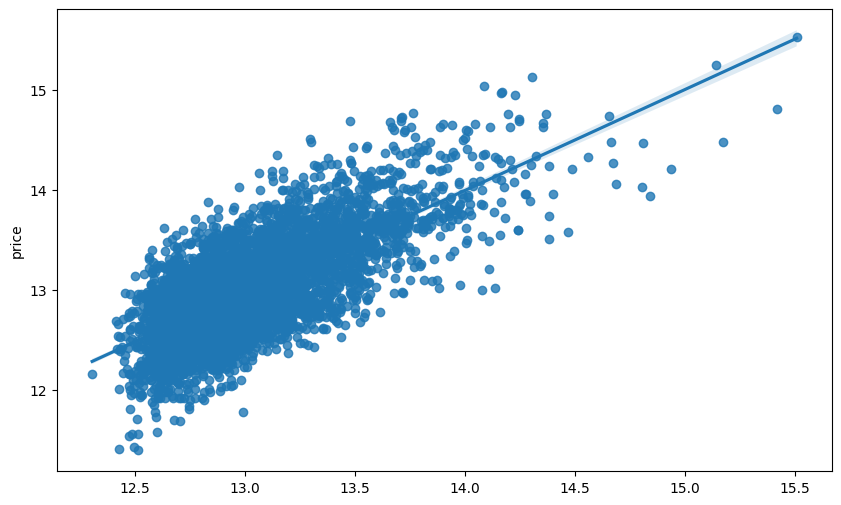

In [79]:
lasso = Lasso(alpha=5)
lassoModel=lasso.fit(X_train_whole,y_train_whole)
predictions_whole_lasso = lassoModel.predict(X_test_whole)
printStatistics(y_test_whole,predictions_whole_lasso)
accuracy = lassoModel.score(X_test_whole, y_test_whole)
"Accuracy: {}%".format(int(round(accuracy * 100)))

## Loading the dataset for which we have to predict the value

In [80]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
submission_test=pd.read_csv('/content/kc_house_data_small_test.csv')

In [81]:
submission_test.shape

(1741, 21)

In [82]:
submission_test['year_sold'] = submission_test['date'].apply(lambda x: int(x[:4]))

In [83]:
submission_test['house_age'] = submission_test[['year_sold']].sub(submission_test['yr_built'], axis=0)

In [84]:
submission_test['is_renovated'] = submission_test['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

Now I will to process the test data same as I did for train data
2] Converting zipcode to categories
3] As I have not used the new columns created for train dataset I will not create them for test dataset
4] Drop the unwanted columns

In [85]:
submission_test.drop(["yr_built", "yr_renovated","date"], axis = 1, inplace = True)

In [86]:
submission_test = pd.get_dummies(submission_test,columns=['zipcode'])

In [87]:
X_new=submission_test[X_whole_features1]

In [88]:
#X_test_new = poly.fit_transform(X_new)

In [90]:
new_pred_class=ridgeReg2.predict(X_new)

NameError: ignored

In [91]:
new_pred_class

NameError: ignored

In [92]:
pd.DataFrame({'ID':submission_test.id,'Price':new_pred_class}).set_index('ID').to_csv('submission1.csv')

NameError: ignored

#<font color=red>**Clustering**</font>


**Table of Contents**
01. Introduction to K-Means Clustering
02. Applications of clustering
03. K-Means Clustering
  1. Intuition
  2. Algorithm

04. Exploratory data analysis
05. K-Means Clustering Model
  1. K-Means model with two clusters
  2. K-Means implimentation from Scratch
  4. Find optimal number of clusters: Elbow Method
6. Ploting clusters
7. References

##<font color=blue>**1. Introduction**</font>

There are three different approaches to machine learning, depending on the data you have. You can go with supervised learning, semi-supervised learning, or unsupervised learning.

In supervised learning you have labeled data, so you have outputs that you know for sure are the correct values for your inputs. That's like knowing car prices based on features like make, model, style, drivetrain, and other attributes.

With semi-supervised learning, you have a large data set where some of the data is labeled but most of it isn't.

This covers a large amount of real world data because it can be expensive to get an expert to label every data point. You can work around this by using a combination of supervised and unsupervised learning.

Unsupervised learning means you have a data set that is completely unlabeled. You don’t know if there are any patterns hidden in the data, so you leave it to the algorithm to find anything it can.

That's where clustering algorithms come in. It's one of the methods you can use in an unsupervised learning problem.

###<font color=green>**1.1 What is Clustering?**</font>


Clustering is an unsupervised machine learning task. You might also hear this referred to as cluster analysis because of the way this method works.

Using a clustering algorithm means you're going to give the algorithm a lot of input data with no labels and let it find any groupings in the data it can.

Those groupings are called clusters. **A cluster is a group of data points that are similar to each other based on their relation to surrounding data points.**


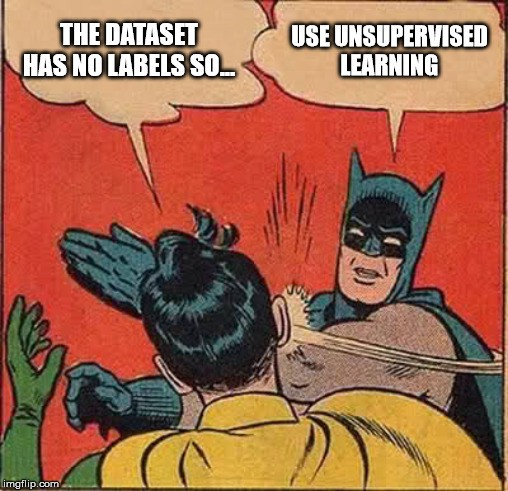

###<font color=green>**1.2 When do we use Clustering?**</font>
There are a lot of different unsupervised learning techniques, like neural networks, reinforcement learning, and clustering. The specific type of algorithm you want to use is going to depend on what your data looks like.

You might want to use clustering when you're trying to do anomaly detection to try and find outliers in your data. It helps by finding those groups of clusters and showing the boundaries that would determine whether a data point is an outlier or not.

If you aren't sure of what features to use for your machine learning model, clustering discovers patterns you can use to figure out what stands out in the data.

Clustering is especially useful for exploring data you know nothing about. It might take some time to figure out which type of clustering algorithm works the best, but when you do, you'll get invaluable insight on your data. You might find connections you never would have thought of.

###<font color=green>**1.3 Types of Clustering Algorithms**</font>


*   Density-based

  Data is grouped by areas of high concentrations of data points surrounded by areas of low concentrations of data points. Basically the algorithm finds the places that are dense with data points and calls those clusters.

  The great thing about this is that the clusters can be any shape. You aren't constrained to expected conditions.

*   Distribution-based

  all of the data points are considered parts of a cluster based on the probability that they belong to a given cluster.

  It works like this: there is a center-point, and as the distance of a data point from the center increases, the probability of it being a part of that cluster decreases.

*   Centroid-based

  It is the one you probably hear about the most. It's a little sensitive to the initial parameters you give it, but it's fast and efficient.

  These types of algorithms separate data points based on multiple centroids in the data. Each data point is assigned to a cluster based on its squared distance from the centroid.

*   Hierarchial-based

  It is typically used on hierarchical data, like you would get from a company database or taxonomies. It builds a tree of clusters so everything is organized from the top-down. It is more restrictive, but works well for specific type of datasets.




##<font color=blue>**2. Applications of Clustering**</font>

K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-


1.   Image segmentation
2.   Customer segmentation
3.   Species clustering
4.   Anomaly detection
5.   Clustering languages



##<font color=blue>**3. Kmeans Clustering**</font>

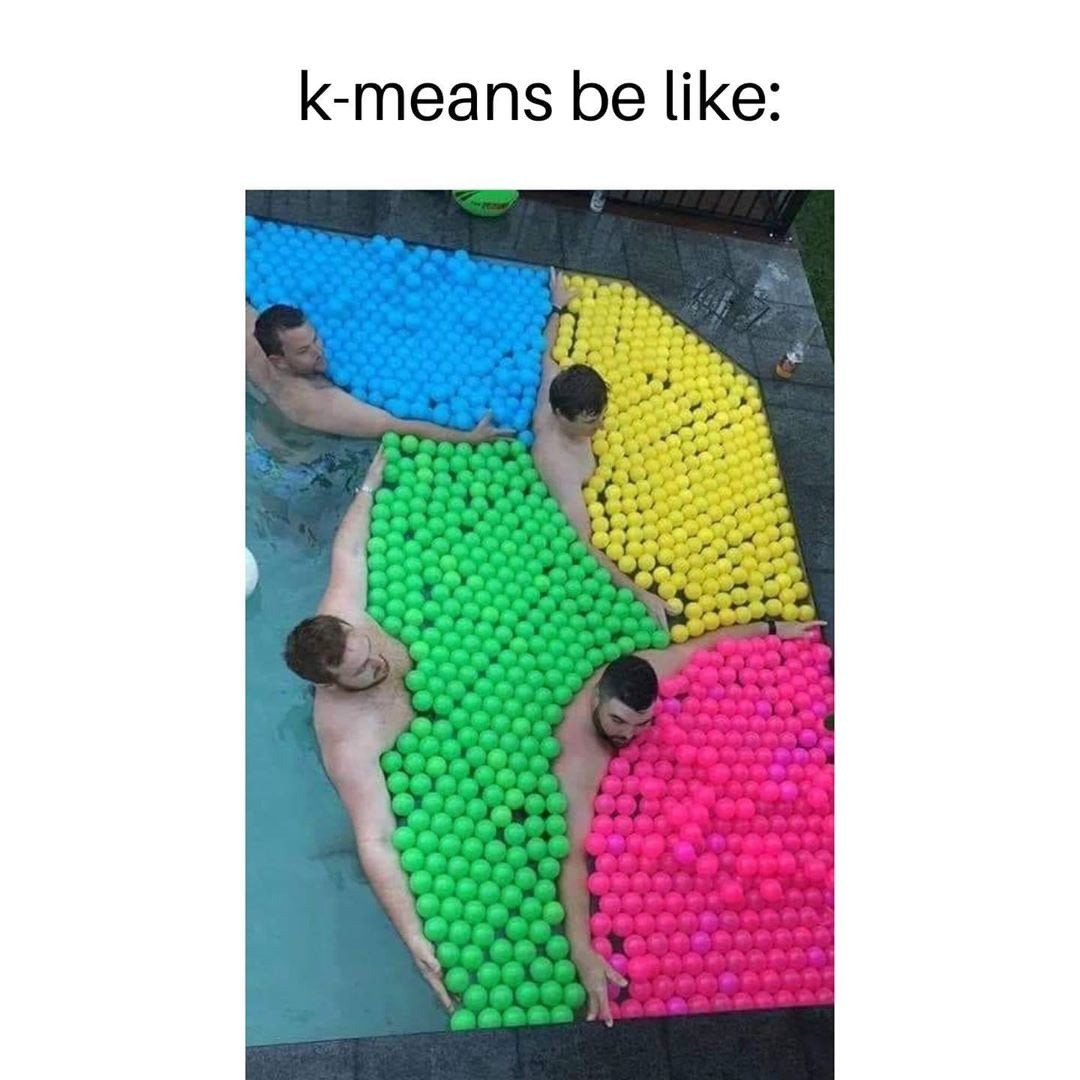

###<font color=green>**3.1 Intuition**</font>

1. The goal of the K-Means algorithm is to find clusters in the given input data.
2. There are a couple of ways to accomplish this.
  1. We can use the trial and error method by specifying the value of K (e.g., 3, 4, 5). As we progress, we keep changing the value until we get the best clusters. Here **K** represents number of clusters and each cluster is defined by its centroid. **Centroid** - A centroid is a data point at the centre of a cluster.

  2. Another method is to use the *Elbow technique* to determine the value of K.

3. Once we get the K's value, the system will assign that many centroids randomly and measure the distance of each of the data points from these centroids.

[Data Assignment Step]

4. Accordingly, it assigns those points to the corresponding centroid from which the distance is minimum. So each data point will be assigned to the centroid, which is closest to it. Thereby we have a K number of initial clusters.

5. For the newly formed clusters, it calculates the new centroid position. The position of the centroid moves compared to the randomly allocated one.

[Centroid Update Step]

6. Once again, the distance of each point is measured from this new centroid point. If required, the data points are relocated to the new centroids, and the mean position or the new centroid is calculated once again.

7. If the centroid moves, the iteration continues indicating no convergence. But once the centroid stops moving (which means that the clustering process has converged), it will reflect the result.

**NOTE:** Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

The K-Means intuition can be represented with the help of following diagram:-

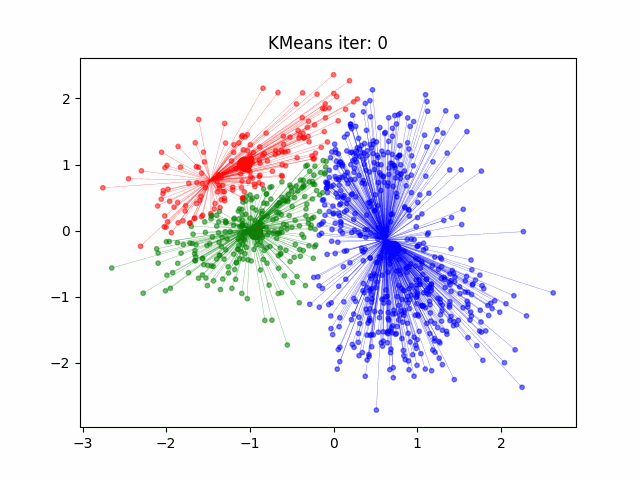

###<font color=green>**3.2 Algorithm**</font>

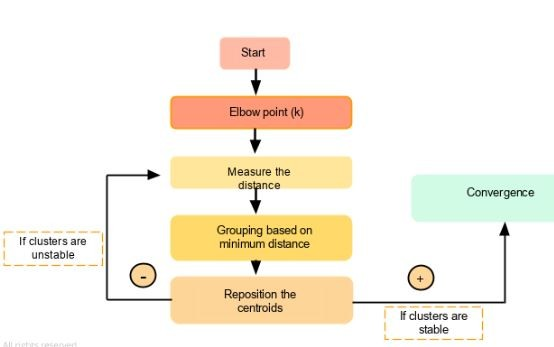

##<font color=blue>**4. Exploratory Data Analysis(EDA)**</font>

###<font color=green>**4.1 Importing libraries and dataset**</font>

In [ ]:
# from warnings import filterwarnings
# filterwarnings("ignore")
# pip3 install skompiler

In [ ]:
import matplotlib.image as mping
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs,make_moons
from yellowbrick.cluster import KElbowVisualizer
import time
from matplotlib.colors import ListedColormap
# from skompiler import skompile
from joblib import dump, load

Might come in handy - SKompiler

The package provides a tool for transforming trained SKLearn models into other forms, such as SQL queries, Excel formulas, Portable Format for Analytics (PFA) files or Sympy expressions (which, in turn, can be translated to code in a variety of languages, such as C, Javascript, Rust, Julia, etc).

Read about it at - https://pypi.org/project/SKompiler/

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_csv("/content/bank_marketing_dataset.csv")
# df = pd.read_csv("../dataset/bank_marketing_dataset.csv")

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.head()

age        job  marital    education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed subscribed
0   56  housemaid  married     basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
1   57   services  married  high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
2   37   services  married  high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
3   40     admin.  married     basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
4   56   services  married  high.school       no      no  yes  telephone   may         mon       307         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no

In [ ]:
# df.origin.value_counts()

In [ ]:
df.describe().T

count     mean     std      min      25%      50%      75%      max
age            41188.000   40.024  10.421   17.000   32.000   38.000   47.000   98.000
duration       41188.000  258.285 259.279    0.000  102.000  180.000  319.000 4918.000
campaign       41188.000    2.568   2.770    1.000    1.000    2.000    3.000   56.000
pdays          41188.000  962.475 186.911    0.000  999.000  999.000  999.000  999.000
previous       41188.000    0.173   0.495    0.000    0.000    0.000    0.000    7.000
emp.var.rate   41188.000    0.082   1.571   -3.400   -1.800    1.100    1.400    1.400
cons.price.idx 41188.000   93.576   0.579   92.201   93.075   93.749   93.994   94.767
cons.conf.idx  41188.000  -40.503   4.628  -50.800  -42.700  -41.800  -36.400  -26.900
euribor3m      41188.000    3.621   1.734    0.634    1.344    4.857    4.961    5.045
nr.employed    41188.000 5167.036  72.252 4963.600 5099.100 5191.000 5228.100 5228.100

###<font color=green>**4.2 EDA**</font>
First, let's try to undertand age distribution of customers.



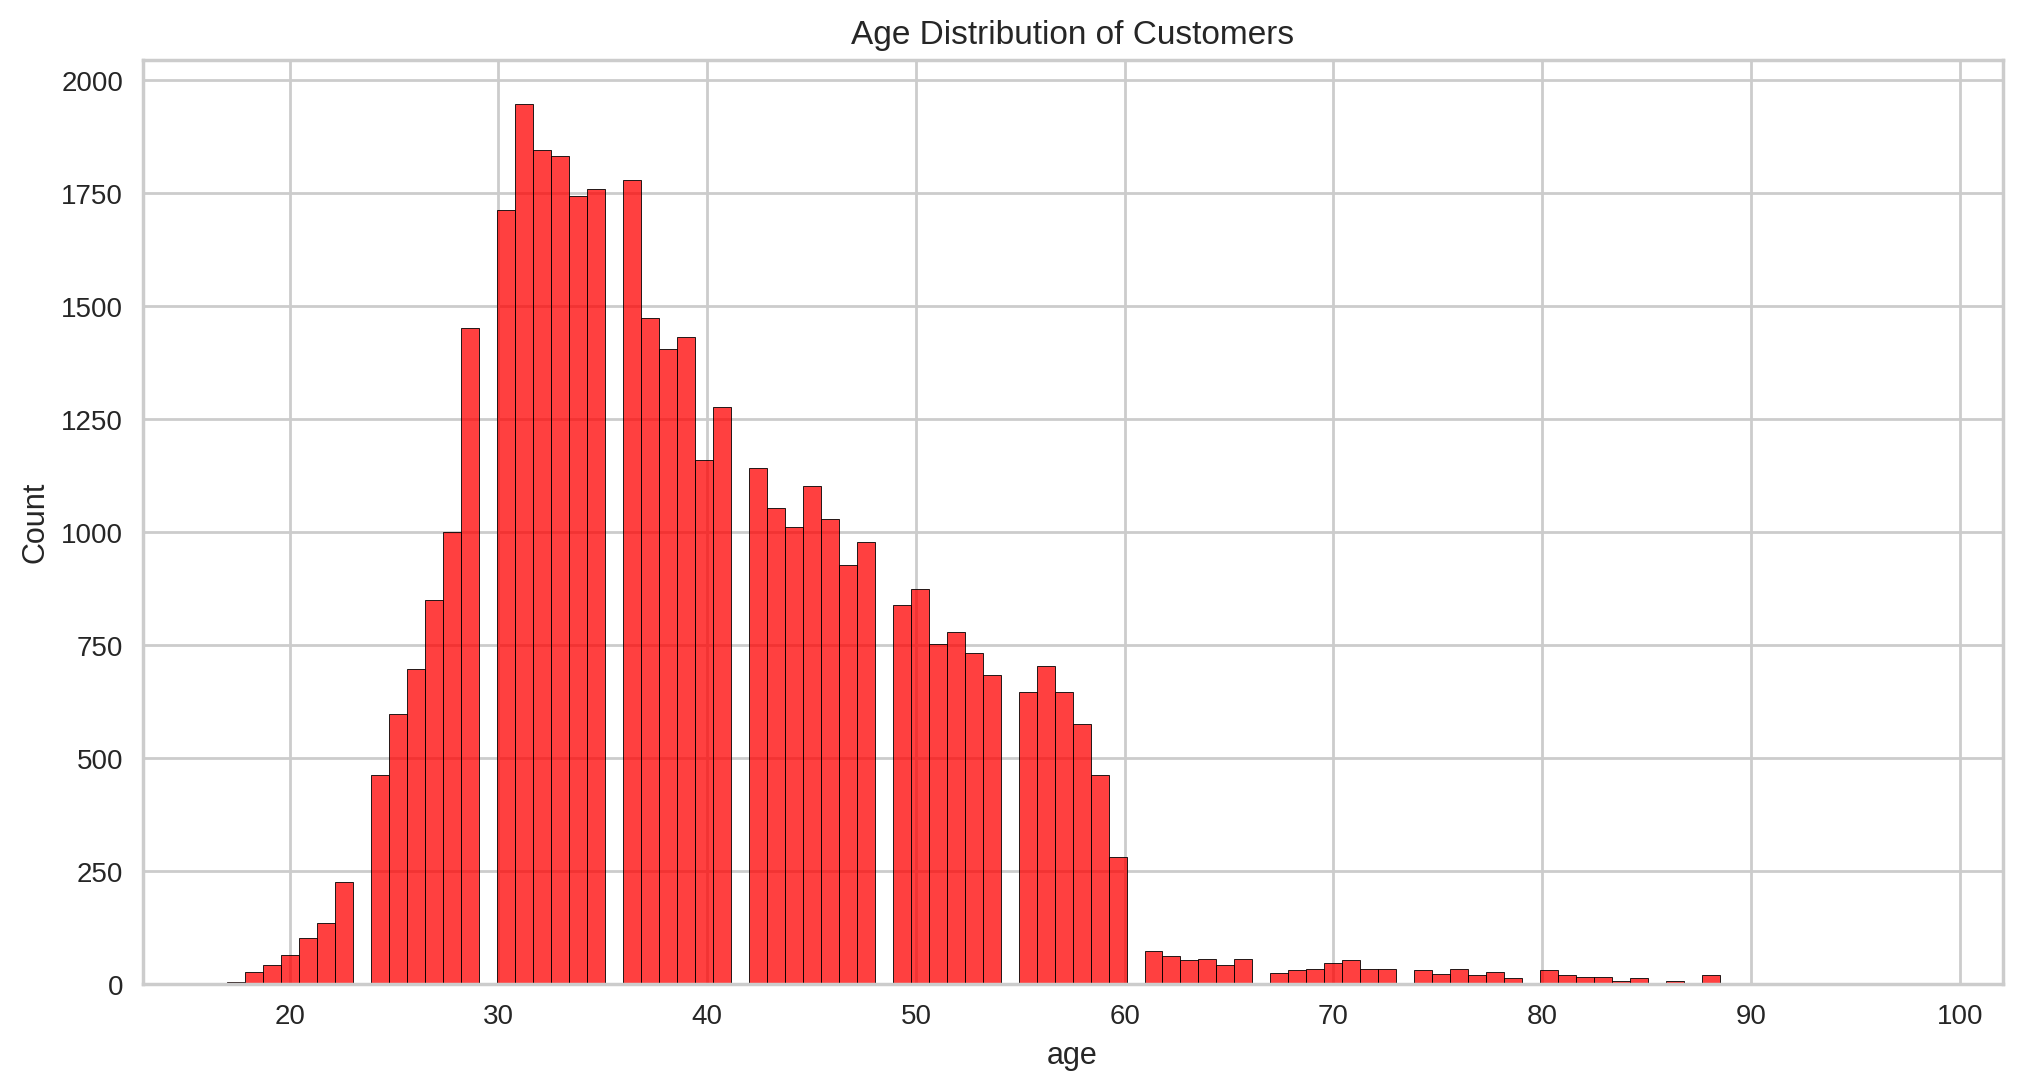

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="age",color="red")
plt.title("Age Distribution of Customers")
plt.show()

We also want to see if there is relation between ages and loan status of customers.

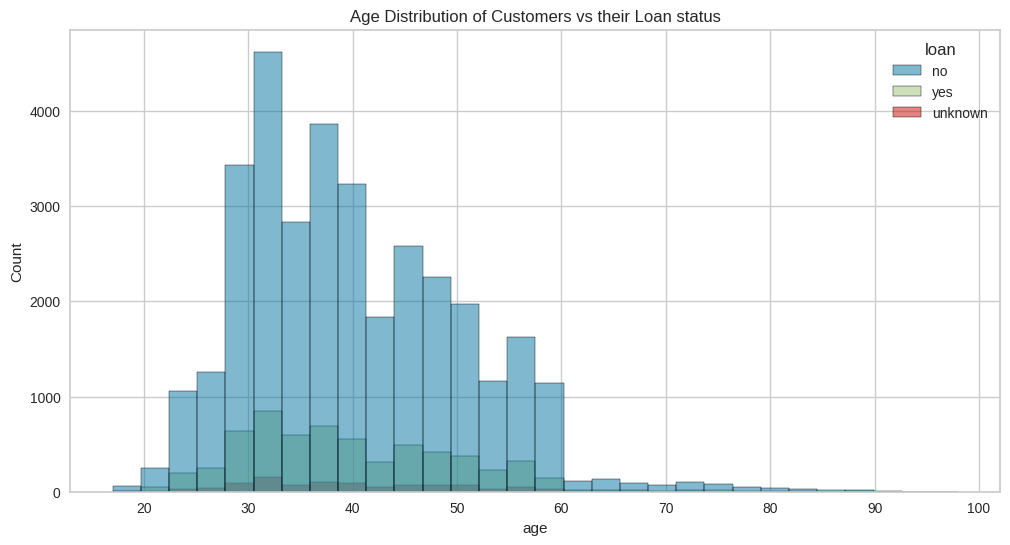

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=df,x="age",hue="loan",bins=30)
plt.title("Age Distribution of Customers vs their Loan status")
plt.show()

Now we will try to undertand marital status distribution of customers.

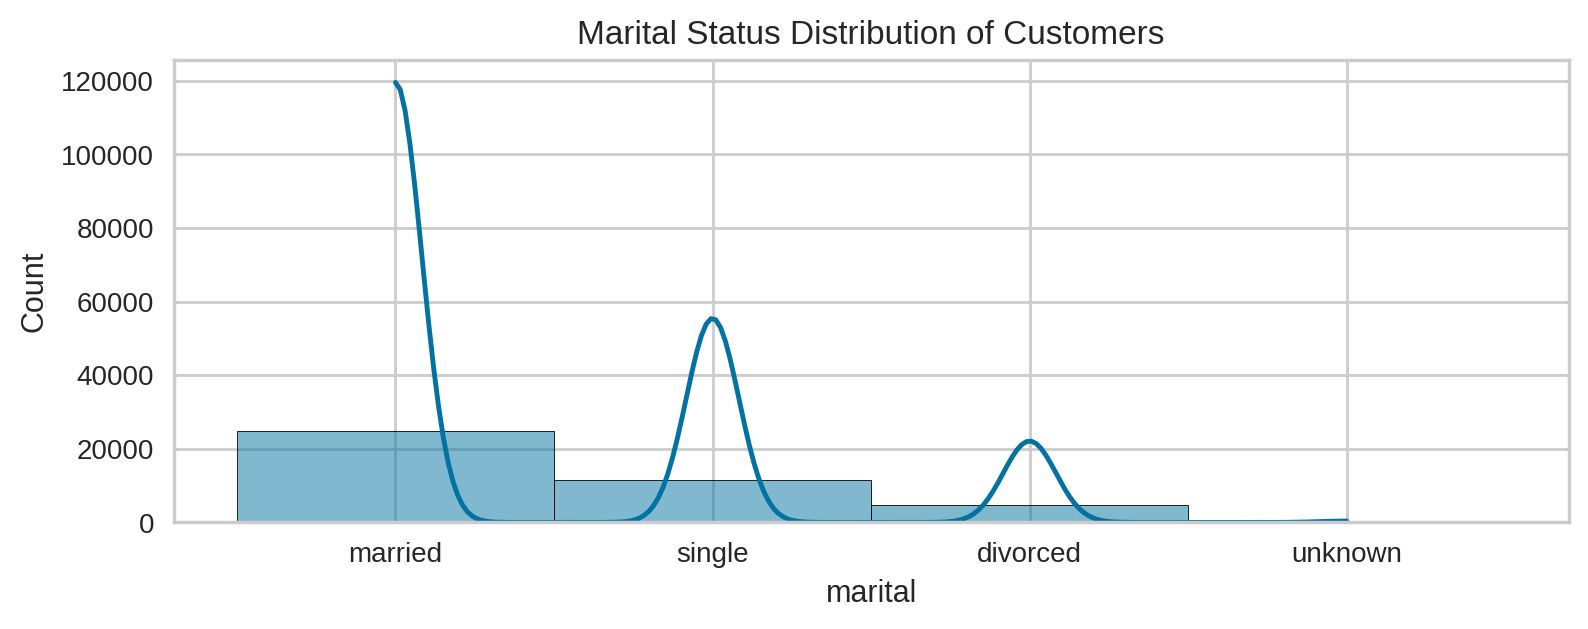

In [ ]:
plt.figure(figsize=(9,3),dpi=200)
sns.histplot(data=df,x="marital",kde=True)
plt.title("Marital Status Distribution of Customers")
plt.show()

pdays column means number of days that passed by after the client was last contacted from a previous campaign. 999 means client was not previously contacted. We will look at that.

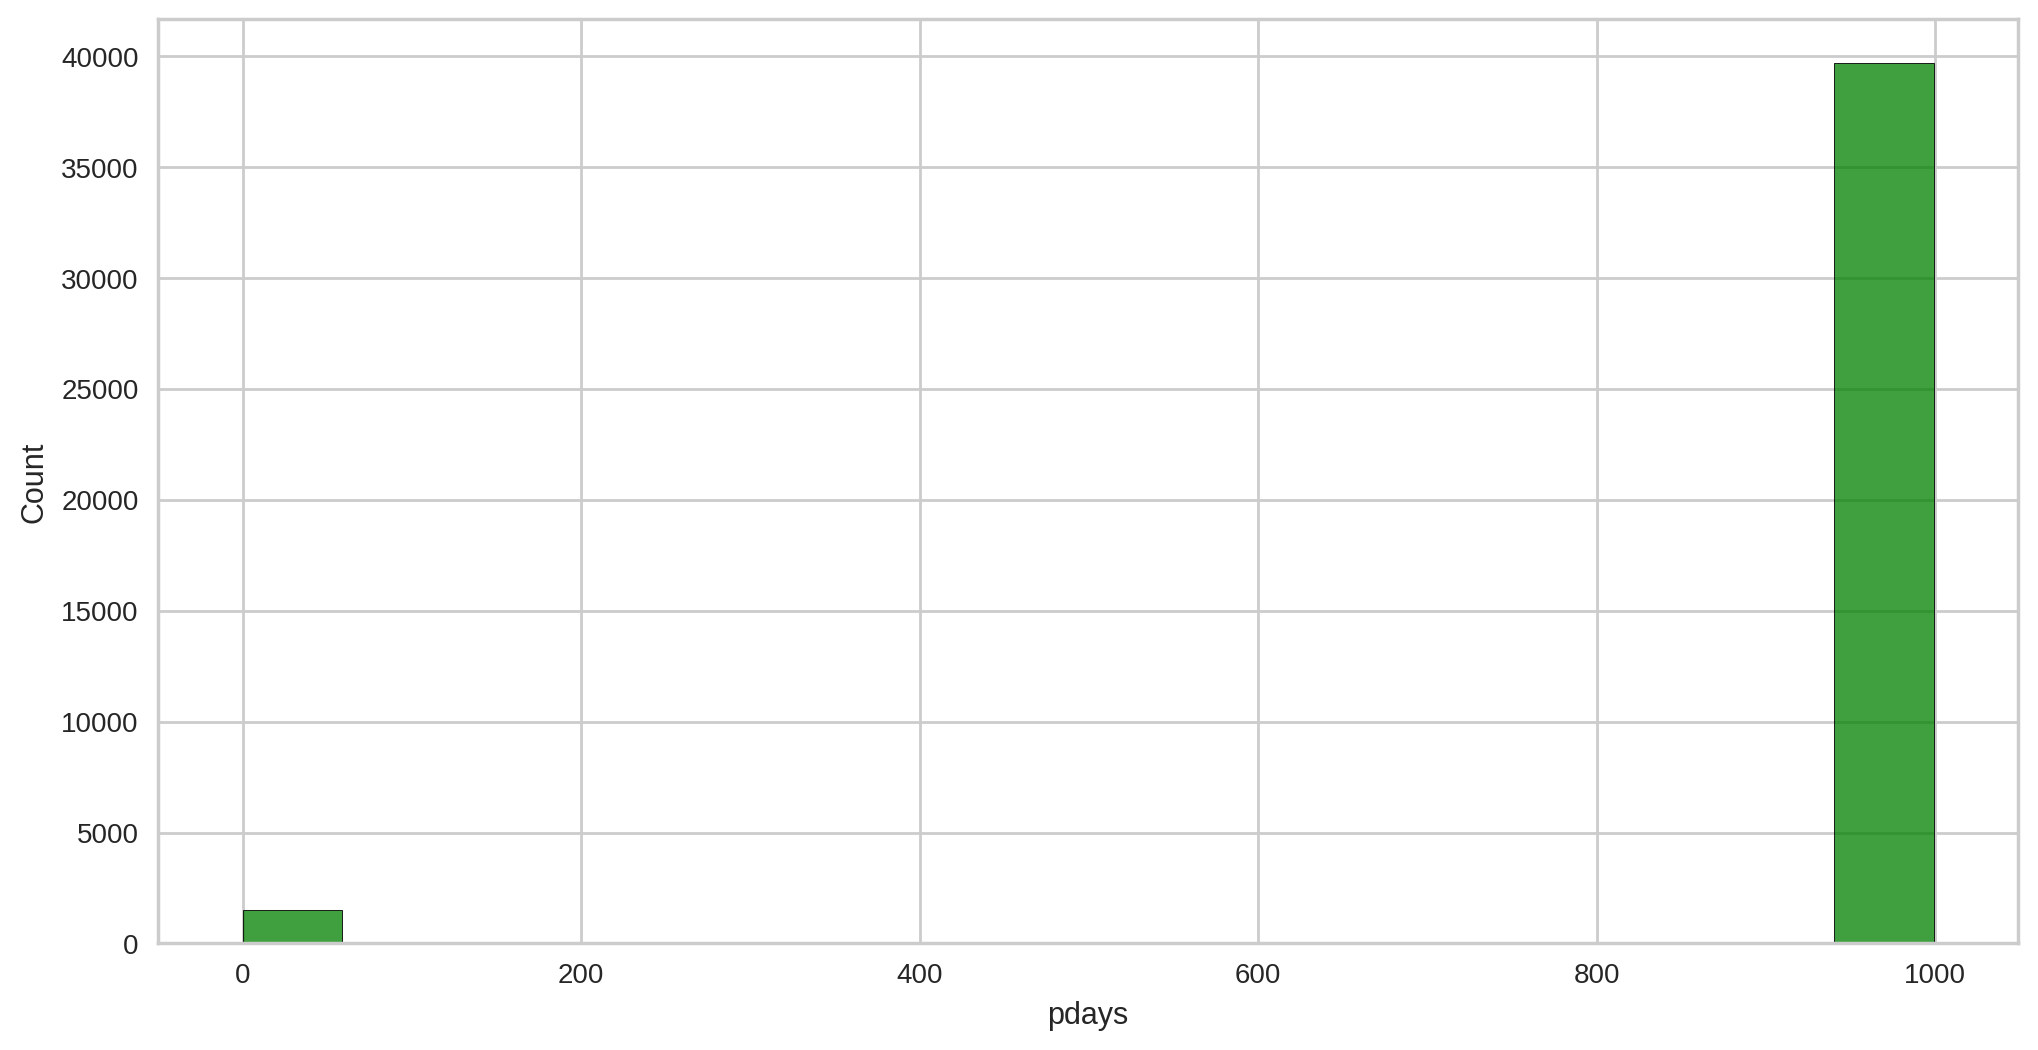

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="pdays",color="green")
plt.show()

In [ ]:
pd.DataFrame(df.pdays.value_counts()).head()

pdays
999  39673
3      439
6      412
4      118
9       64

As we can see, there are many clients that was not previously contacted. Now we will look only contacted clients.

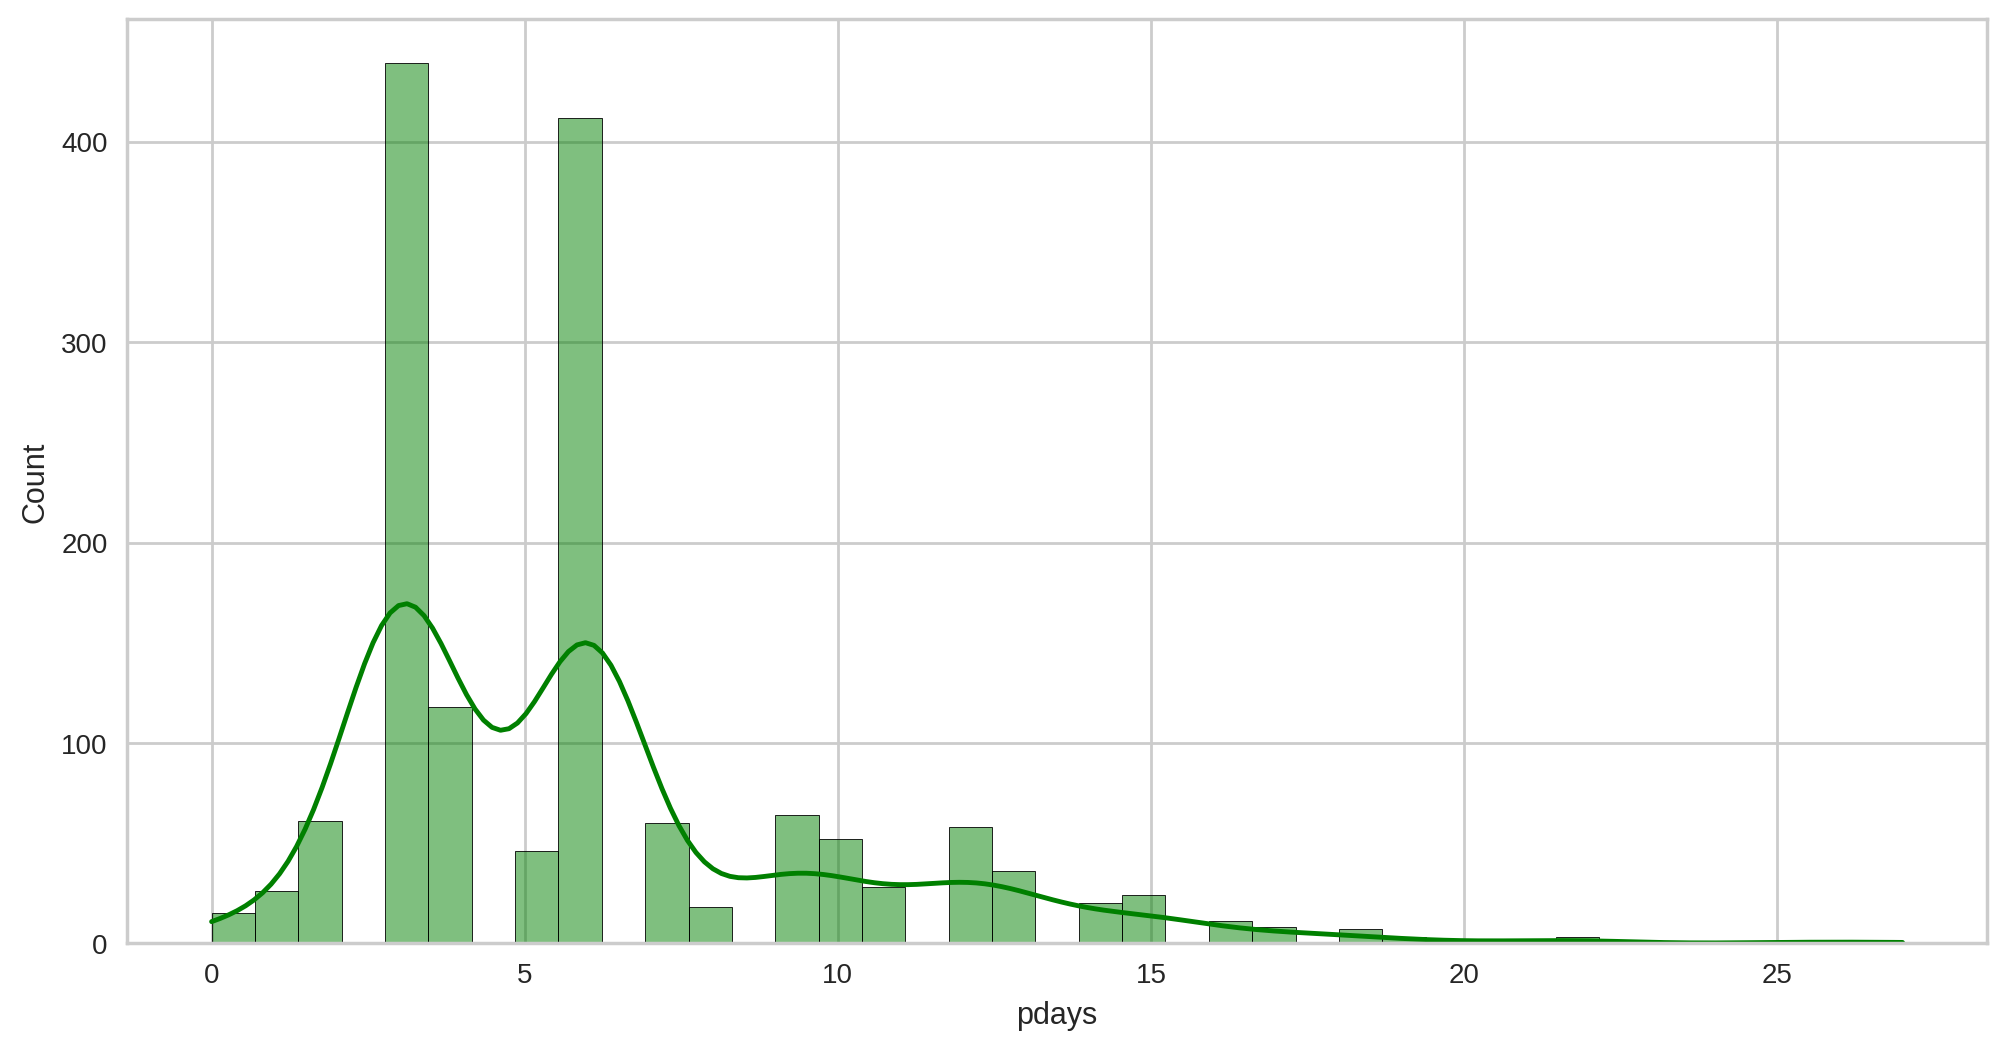

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df.pdays!=999],x="pdays",color="green",kde=True)
plt.show()

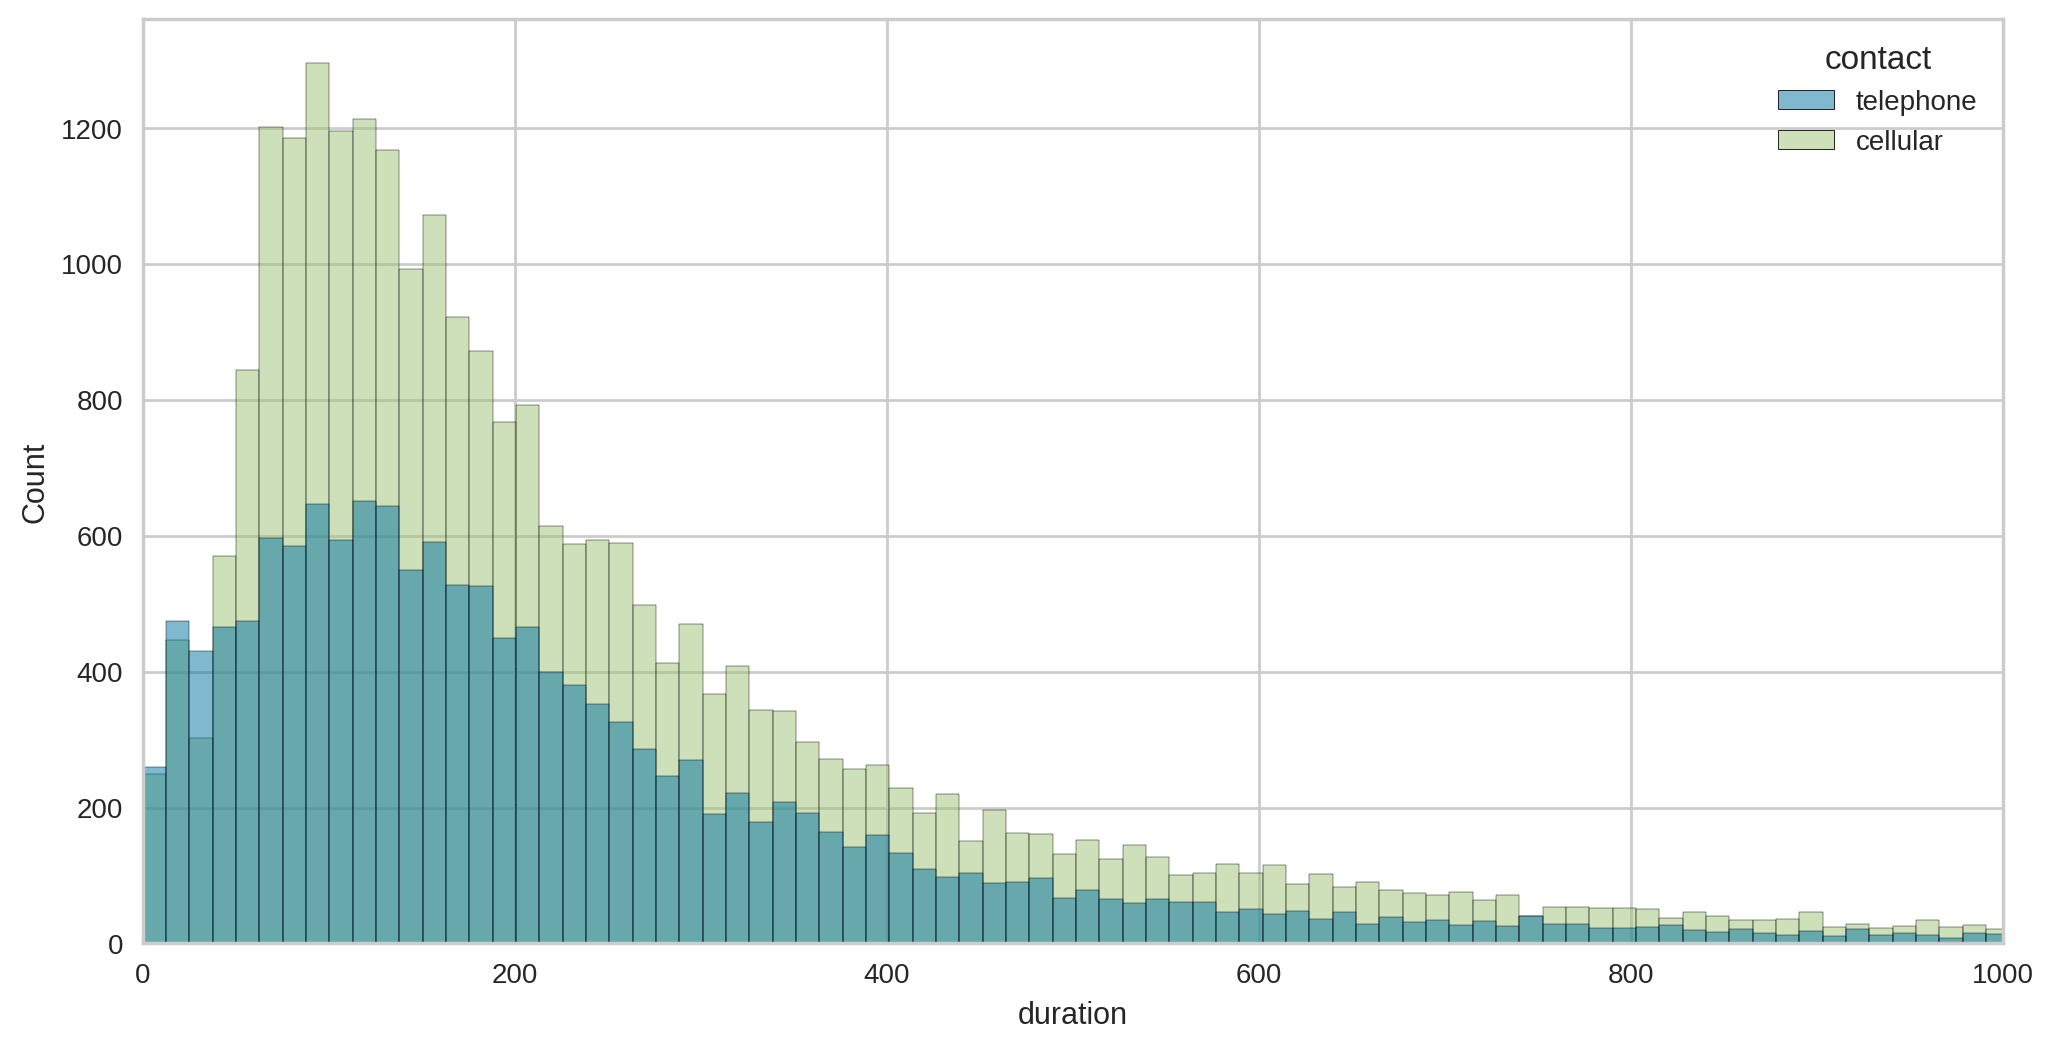

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="duration",hue="contact",color="purple")
plt.xlim(0,1000)
plt.show()

Now we will look loan status of customers.

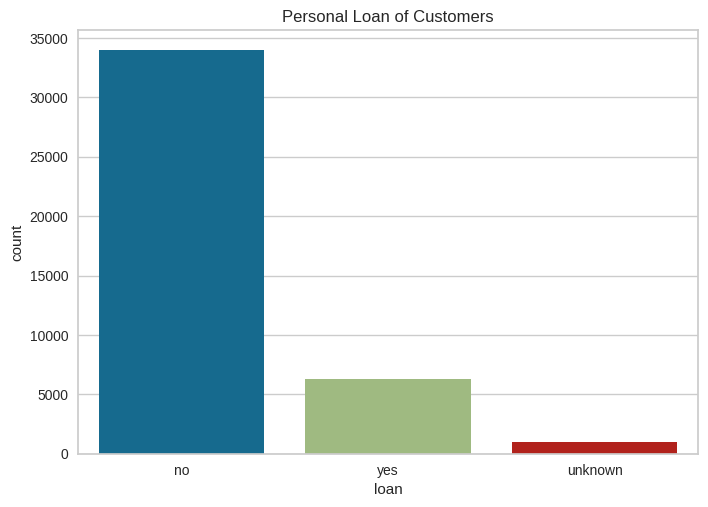

In [ ]:
sns.countplot(data=df,x="loan")
plt.title("Personal Loan of Customers")
plt.show()

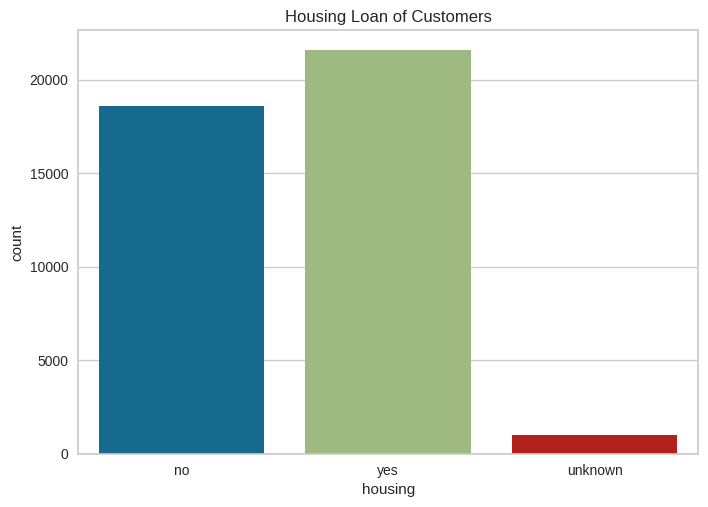

In [ ]:
sns.countplot(data=df,x="housing")
plt.title("Housing Loan of Customers")
plt.show()

Now we will look jobs of customers.

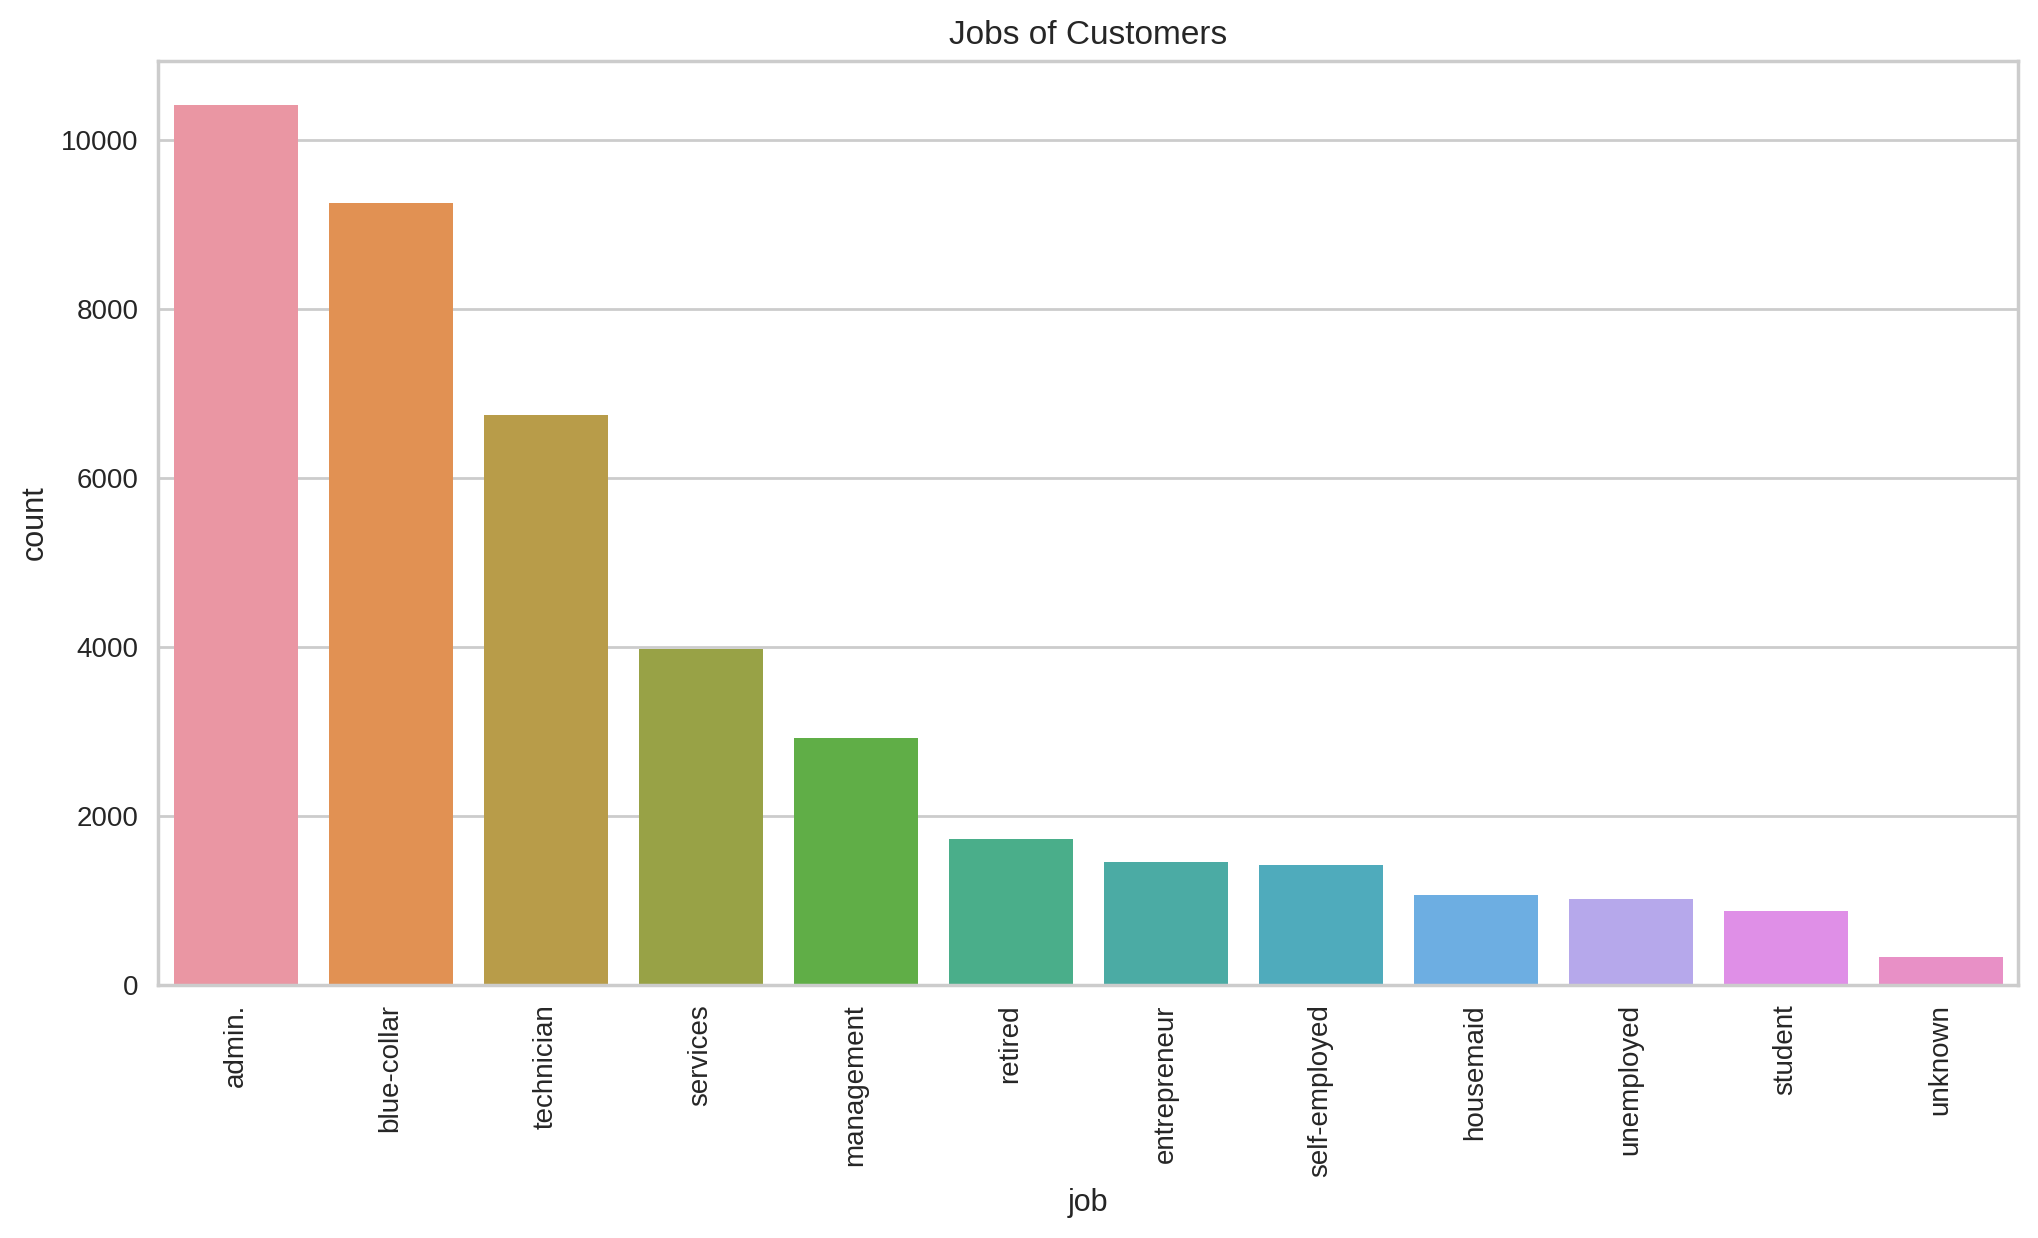

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="job",order=df.job.value_counts().index)
plt.title("Jobs of Customers")
plt.xticks(rotation=90)
plt.show()

Now we will look education of customers.

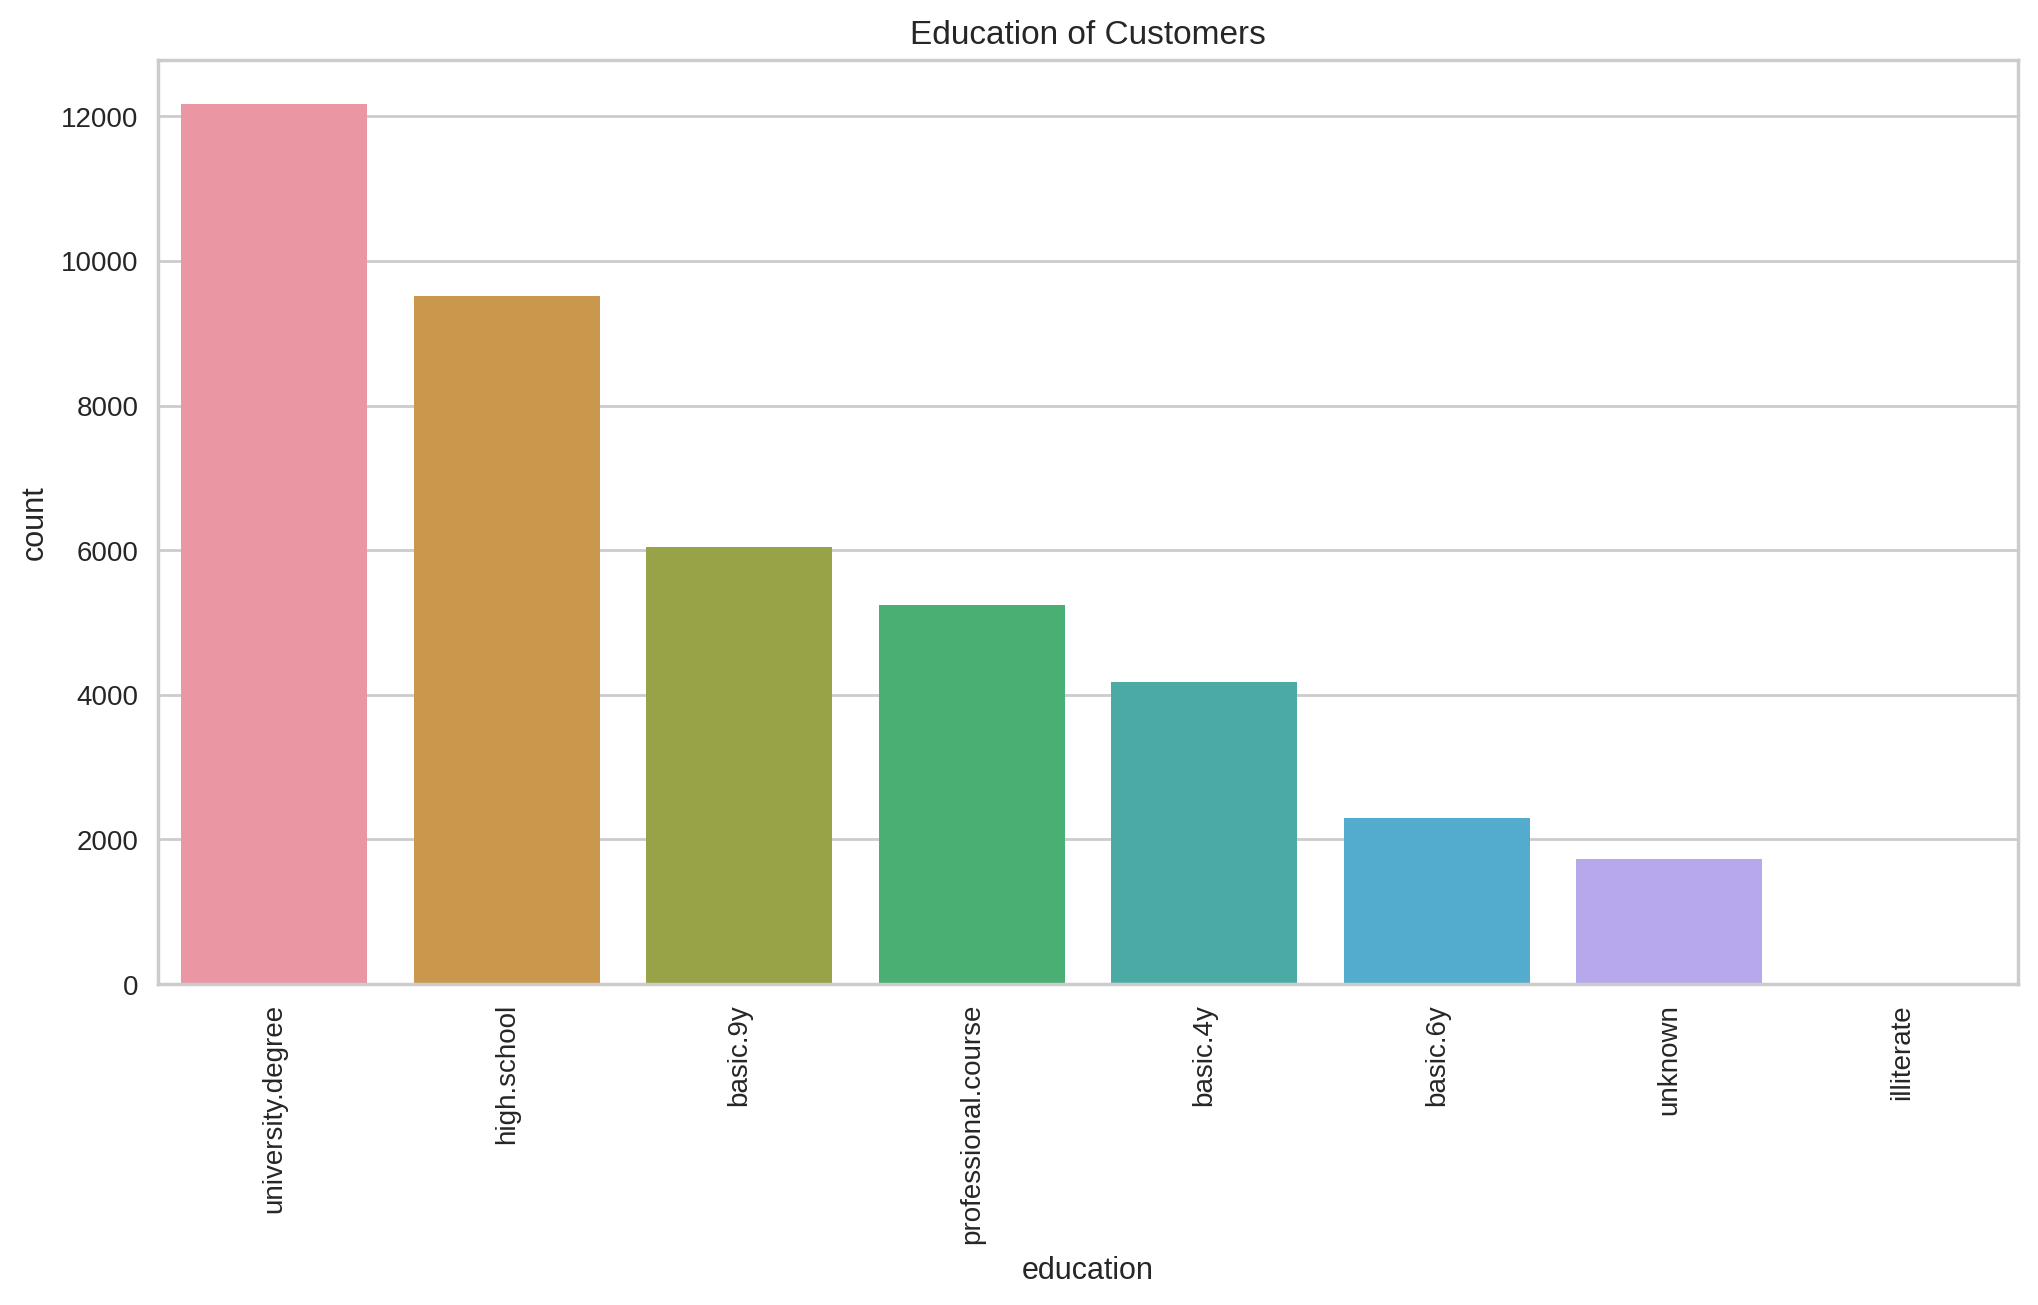

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="education",order=df.education.value_counts().index)
plt.title("Education of Customers")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.head()

age        job  marital    education  default housing loan    contact month day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed subscribed
0   56  housemaid  married     basic.4y       no      no   no  telephone   may         mon       261         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
1   57   services  married  high.school  unknown      no   no  telephone   may         mon       149         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
2   37   services  married  high.school       no     yes   no  telephone   may         mon       226         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
3   40     admin.  married     basic.6y       no      no   no  telephone   may         mon       151         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no
4   56   services  married  high.school       no      no  yes  telephone   may         mon       307         1    999         0  nonexistent         1.100          93.994        -36.400      4.857     5191.000         no

In order to calculate distances for K-Means cluestering, all features must be in numeric format. To solve this issue, we will apply **dummy method**.

In [ ]:
df.shape

(41188, 21)

In [ ]:
df_dummies = pd.get_dummies(df)

In [ ]:
df_dummies.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  education_basic.4y  education_basic.6y  education_basic.9y  education_high.school  education_illiterate  education_professional.course  education_university.degree  education_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  contact_cellular  contact_telephone  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  subscribed_no  subscribed_yes
0   56       261         1    999         0         1.100          93.994        -36.400      4.857     5191.000           0                0                 0              1               0            0                  0             0            0               0               0            0                 0                1               0                0                   1                   0                   0                      0                     0                              0                            0                  0           1                0            0           1                0            0        1             0         0                 0                  1          0          0          0          0          0          0          1          0          0          0                0                1                0                0                0                 0                     1                 0              1               0
1   57       149         1    999         0         1.100          93.994        -36.400      4.857     5191.000           0                0                 0              0               0            0                  0             1            0               0               0            0                 0                1               0                0                   0                   0                   0                      1                     0                              0                            0                  0           0                1            0           1                0            0        1             0         0                 0                  1          0          0          0          0          0          0          1          0          0          0                0                1                0                0                0                 0                     1                 0              1               0
2   37       226         1    999         0         1.100          93.994        -36.400      4.857     5191.000           0                0                 0              0               0            0                  0             1            0               0               0            0                 0                1               0                0                   0                   0                   0                      1                     0                              0                            0                  0           1                0            0           0                0            1        1             0         0                 0                  1          0          0          0          0          0          0          1          0          0          0                0                1                0                0                0                 0                     1                 0              1               0
3   40       151         1    999         0         1.100      

In [ ]:
df_dummies.shape

(41188, 65)

###<font color=green>**4.2 Scaling**</font>

As we can see, it created new column for each category of each feature.

Because we are dealing with distance metric,we will apply scaling.

In [ ]:
scaler = StandardScaler()

<font color=red>**Homework** :- Can/should we use other types of scaling techniques?
e.g. - MinMaxScalar </font>

Blog on feature scaling - [towardsdatascience](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

Types of scalers - [geeksforgeeks](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/)

In [ ]:
df_scaled = scaler.fit_transform(df_dummies)

In [ ]:
df_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

##<font color = blue>**5. Model**</font>

###<font color=green>**5.1 Kmeans model with two clusters**</font>

In [ ]:
df_scaled[0]

array([ 1.53303429,  0.01047142, -0.56592197,  0.1954139 , -0.34949428,
        0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991,
       -0.58202282, -0.53831699, -0.19143021,  6.15277204, -0.2764353 ,
       -0.2087573 , -0.18903213, -0.3265564 , -0.1473267 , -0.44244927,
       -0.15887166, -0.08987076, -0.35509663,  0.80763764, -0.62493754,
       -0.04411455,  2.97708361, -0.24274754, -0.41474269, -0.54809999,
       -0.0209096 , -0.38191849, -0.64753149, -0.20945296,  0.51371278,
       -0.51359953, -0.00853476,  1.10081447, -0.1569334 , -1.04887691,
        0.46173139, -0.1569334 , -0.42287213, -1.31826996,  1.31826996,
       -0.26127446, -0.42007603, -0.06662113, -0.45925282, -0.38504233,
       -0.11590677,  1.41115463, -0.33253245, -0.13319736, -0.11846175,
       -0.484371  ,  1.95899952, -0.51458089, -0.49439422, -0.4960667 ,
       -0.3392905 ,  0.39770593, -0.1857    ,  0.35630932, -0.35630932])

In [ ]:
k_means_model = KMeans(n_clusters=2) #n_clusters is K value.

In [ ]:
k_means_model.fit(df_scaled)

KMeans(n_clusters=2)

In [ ]:
cluster_labels = k_means_model.predict(df_scaled)
#we can also do that with fit_predict() method.

In [ ]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
df_dummies["Cluster"] = cluster_labels
df_dummies.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  education_basic.4y  education_basic.6y  education_basic.9y  education_high.school  education_illiterate  education_professional.course  education_university.degree  education_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  contact_cellular  contact_telephone  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success  subscribed_no  subscribed_yes  Cluster
0   56       261         1    999         0         1.100          93.994        -36.400      4.857     5191.000           0                0                 0              1               0            0                  0             0            0               0               0            0                 0                1               0                0                   1                   0                   0                      0                     0                              0                            0                  0           1                0            0           1                0            0        1             0         0                 0                  1          0          0          0          0          0          0          1          0          0          0                0                1                0                0                0                 0                     1                 0              1               0        0
1   57       149         1    999         0         1.100          93.994        -36.400      4.857     5191.000           0                0                 0              0               0            0                  0             1            0               0               0            0                 0                1               0                0                   0                   0                   0                      1                     0                              0                            0                  0           0                1            0           1                0            0        1             0         0                 0                  1          0          0          0          0          0          0          1          0          0          0                0                1                0                0                0                 0                     1                 0              1               0        0
2   37       226         1    999         0         1.100          93.994        -36.400      4.857     5191.000           0                0                 0              0               0            0                  0             1            0               0               0            0                 0                1               0                0                   0                   0                   0                      1                     0                              0                            0                  0           1                0            0           0                0            1        1             0         0                 0                  1          0          0          0          0          0          0          1          0          0          0                0                1                0                0                0                 0                     1                 0              1               0        0
3   40       151         1 

Now we can look at correlations of each feature with clusters that we assigned.

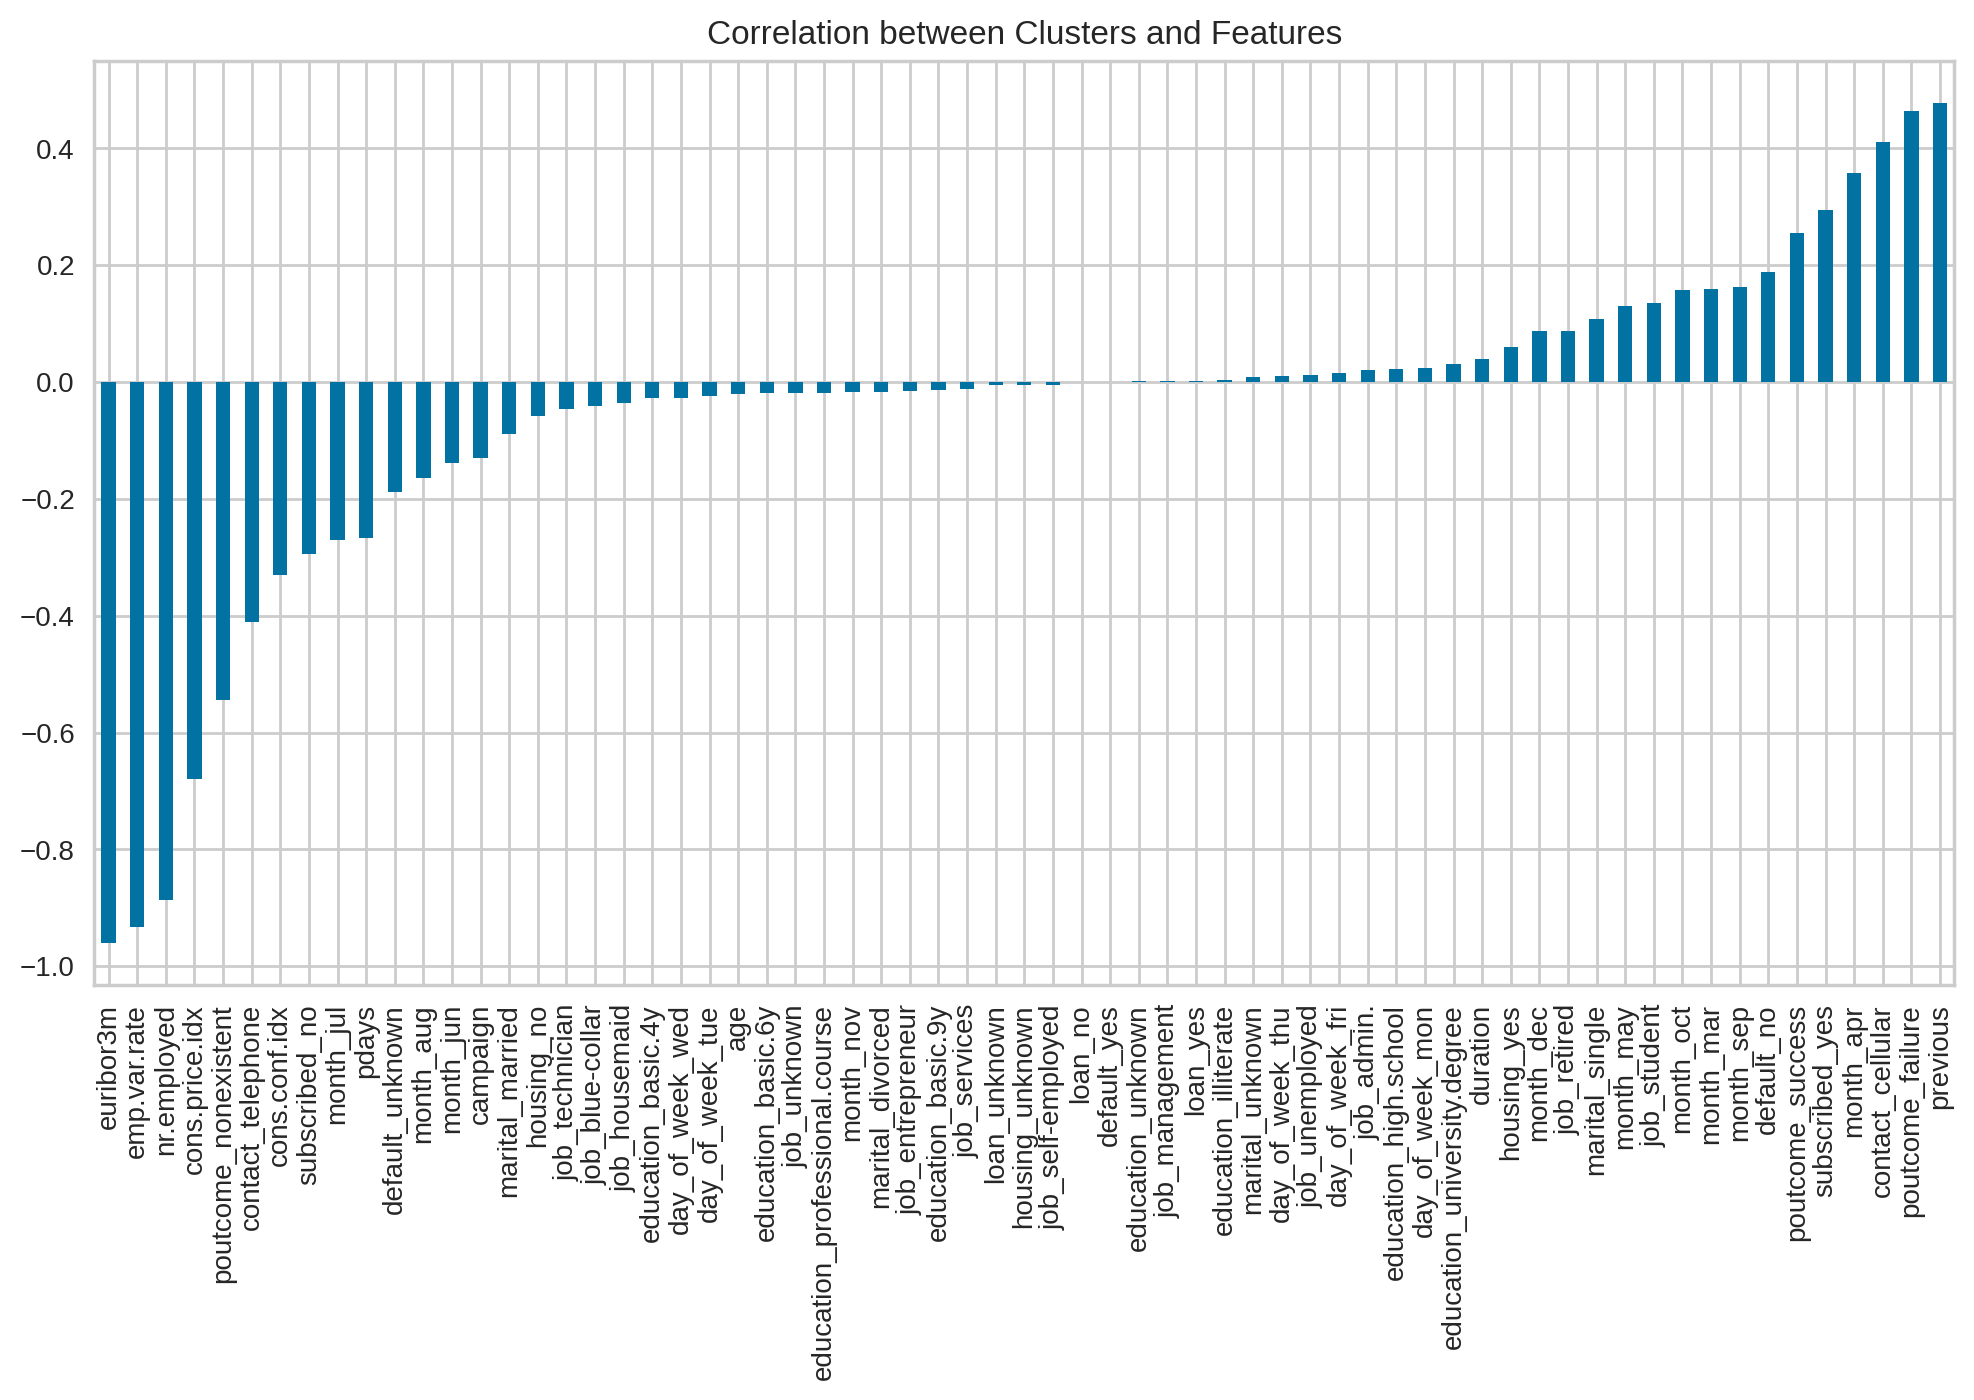

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
df_dummies.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

### <font color= green>**5.2 Kmeans from scratch**</font>

<font color= red>**Homework: Impliment Kmeans clustering from scratch.**</font>

Sample below shows implimentation of Kmeans clustering from scratch on different problem. You can take this as reference to impliment the algorithm for the problem in this notebook.

In [ ]:
'''
### Example of from-scratch implimentation of Kmeans Clustering -

import numpy as np
import random as rd
class Kmeans:
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]

    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([])
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T

    def fit(self,n_iter):
        #randomly Initialize the centroids
        self.Centroids=self.kmeanspp(self.X,self.K)

        """for i in range(self.K):
            rand=rd.randint(0,self.m-1)
            self.Centroids=np.c_[self.Centroids,self.X[rand]]"""

        #compute euclidian distances and assign clusters
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1
            #adjust the centroids
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]

            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)

            self.Output=Y


    def predict(self):
        return self.Output,self.Centroids.T

    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

'''

'''
### To call k-means function-

kmeans=Kmeans(X,K)
kmeans.fit(n_iter)
Output,Centroids=kmeans.predict()
'''

###<font color= green>**5.3 Finding optimal number of clusters: Elbow Method**</font>

How to find optimal number of clusters (K)?

The Elbow method is the best way to find the number of clusters. The elbow method constitutes running K-Means clustering on the dataset.
Next, we use within-sum-of-squares as a measure to find the optimum number of clusters that can be formed for a given data set. Within the sum of squares (WSS) is defined as the sum of the squared distance between each member of the cluster and its centroid.

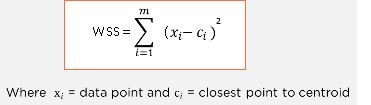

The WSS is measured for each value of K. The value of K, which has the least amount of WSS, is taken as the optimum value.
Now, we draw a curve between WSS and the number of clusters.

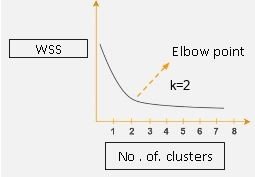

In [ ]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(df_dummies)

    ssd.append(model.inertia_)
    ## SSD Point to cluster centers

In [ ]:
ssd

In [ ]:
plt.plot(range(2,10),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [ ]:
pd.Series(ssd).diff()

<font color= red>**Homework :- What are other methods of finding optimal number of clusters? Impliment and use one of them here.**</font>

###<font color= green>**5.4 Kmeans model with optimal number of clusters**</font>

In [ ]:
k_means_sk5 = KMeans(n_clusters=4)
k_means_sk5.fit(df_scaled)
cluster_labels = k_means_sk5.predict(df_scaled)
cluster_labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [ ]:
df_dummies["Cluster"] = cluster_labels
df_dummies.head()

##<font color= blue>**6. Ploting Clusters**</font>

<font color= red>**homework: plot the clusters obtained using kmeans clustering algorithm above**</font>

In [ ]:
# #filter rows of original data
# filtered_label0 = df_dummies[cluster_labels == 0]

# filtered_label8 = df_dummies[cluster_labels == 2]
# #plotting the results
# plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1], color = 'red')
# plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1], color = 'black')
# plt.show()

In [ ]:
# #Getting unique labels
# u_labels = np.unique(cluster_labels)

# #plotting the results:
# for i in u_labels:
#     plt.scatter(
#         df_dummies.iloc[cluster_labels == i , 0].values ,
#         df_dummies.iloc[cluster_labels == i , 1].values ,
#         cluster_labels = i)
# plt.legend()
# plt.show()

##<font color= blue>**7. References Links**</font>

1. Unsupervised Learning - Clustering: [Kaggle](https://www.kaggle.com/code/berkayalan/unsupervised-learning-clustering-complete-guide#Content)
(Example for the tutorial is taken from this notebook)

2. **Kmeans and Kmeans++** - Detailed Theory and Implimentation: [TDS](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

3. Kmeans from scratch : [Medium](https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42)

3. Kmeans example in python: [Kaggle](https://www.kaggle.com/code/prashant111/k-means-clustering-with-python#3.-K-Means-Clustering-intuition-)

4. Kmeans- Real usecase: [LinkedIn](https://www.linkedin.com/pulse/k-means-clustering-its-real-use-case-surayya-shaikh/)

5. Hierarchial Clustering: [TDS](https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec)

6. DBSCAN Clustering: [TDS](https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556#:~:text=e.g.%20anomaly%20detection.-,DBSCAN%20algorithm,many%20points%20from%20that%20cluster.)

7. 8 Clustering Algorithms [FreeCodeCamp](https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/)

8. Blog on feature scaling - [towardsdatascience](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)

9. Types of scalers - [geeksforgeeks](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/)


##CLASSIFICATION-1
#### Understanding Distance metrics and Introduction to KNN

---

## **SECTION - 1 : Distance metrics**

In [ ]:
# Importing Required Libraries
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

### **Euclidean Distance**

There is more than one way to define distance. The most familiar distance metric is probably _Euclidean distance_, which is the straight-line distance between the two points. The formula for calculating this distance is a generalization of the Pythagorean theorem:

$$ d({\bf x}, {\bf x'}) = \sqrt{\sum_{j=1}^D (x_j - x'_j)^2} $$
  
    
                            

                              
                              

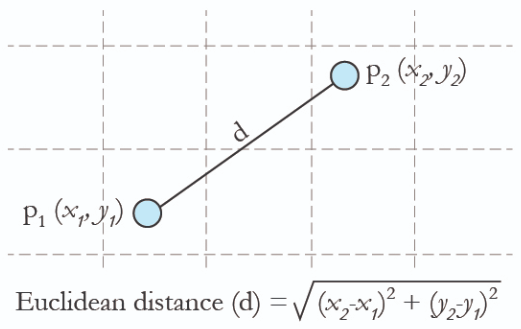

[Image Source](https://www.google.com/imgres?imgurl=https%3A%2F%2Fwww.tutorialexample.com%2Fwp-content%2Fuploads%2F2020%2F05%2FEuclidean-distance-in-tensorflow.png&imgrefurl=https%3A%2F%2Fwww.tutorialexample.com%2Fcalculate-euclidean-distance-in-tensorflow-a-step-guide-tensorflow-tutorial%2F&tbnid=xB3LUnhOEpdklM&vet=12ahUKEwj_qrjI3dfxAhXTJCsKHX_7DDgQMygDegUIARDLAQ..i&docid=AIcC7trk2GUB6M&w=521&h=329&q=euclidean%20distance&ved=2ahUKEwj_qrjI3dfxAhXTJCsKHX_7DDgQMygDegUIARDLAQ)

In [ ]:
# Simple 2D example
x_1 = np.array((1, 2))
x_2 = np.array((4, 6))

In [ ]:
# Naive approach to calculating Euclidean distance (not-vectorized)
sumv = 0
for i in range(len(x_1)):
  sumv += ((x_1[i]-x_2[i])**2)
dist = math.sqrt(sumv)
print(dist)

5.0


In [ ]:
## TASK-1
## Write a vectorized version of computing Euclidean distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'euclidean_dist'
## Verify this result with what you saw above

# Write your code below and uncomment the lines below in order to run the cell.

# euclidean_dist =
# print(euclidean_dist)

In [ ]:
#@title Answer to Task-1
# Answer:
euclidean_dist = np.sqrt(np.sum((x_1-x_2)**2))
print(euclidean_dist)

In [ ]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x_1, x_2)
print(euclidean_dist)

5.0


In [ ]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempeuclid = np.sqrt((meshx**2 + meshy**2))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Manhattan Distance**

Euclidean distance is not the only way to measure how far apart two points are. [**Manhattan distance**](https://en.wikipedia.org/wiki/Taxicab_geometry) (also called _taxicab distance_) measures the distance a taxicab in would have to drive to travel from A to B. Taxicabs cannot travel in a straight line because they have to follow the street grid. But there are multiple paths along the street grid that all have exactly the same length; the Manhattan distance is the length of any one of these shortest paths.
The formula for Manhattan distance is as follows:
$$ d({\bf x}, {\bf x'}) = \sum_{j=1}^D |x_j - x'_j| $$  
  
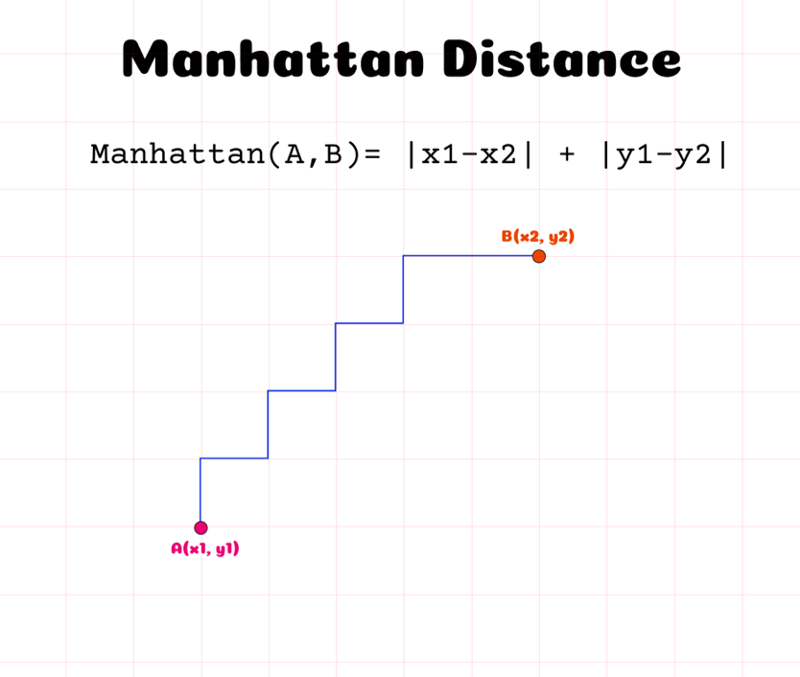  


[Image Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Faigents.co%2Fblog%2Fpublication%2Fdistance-metrics-for-machine-learning&psig=AOvVaw3oUdVhaRKBIADWyXWDUoLZ&ust=1625576456552000&source=images&cd=vfe&ved=0CAoQjRxqFwoTCOC6pa3-y_ECFQAAAAAdAAAAABAD)

In [ ]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
manhattan_dist = distance.cityblock(x_1, x_2)
print(manhattan_dist)

7


In [ ]:
## TASK-2
## Write a vectorized version of computing Manhattan distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'manhattan_dist'
## Verify your result with the output of the scipy function in the previous cell.

# Write your code below and uncomment the lines below in order to run the cell.

# manhattan_dist =
# print(manhattan_dist)

In [ ]:
#@title Answer to Task-2
# Answer:
manhattan_dist = np.sum(np.abs((x_1 - x_2)))
print(manhattan_dist)

In [ ]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)

In [ ]:
tempmanhattan = np.abs(meshx) + np.abs(meshy)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### **Minkowski Distance**

Minkowski distance is a generalized form of Euclidean and Manhattan distance. We can raise the absolute difference to any power $p$ and take the $p$th root. The formula for Minkowski distance is:
$$ d({\bf x}, {\bf x'}) = \left(\sum_{j=1}^D |x_j - x'_j|^p\right)^{1/p}. $$
Manhattan distance and Euclidean distance are special cases of Minkowski distance for $p=1$ and $p=2$, respectively.

In [ ]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))
minkowski_distance = distance.minkowski(x_1, x_2, p=3)
print("Minkowski distance when p=3 is ",minkowski_distance)

Minkowski distance when p=3 is  4.497941445275415


In [ ]:
# You can verify that this distance is the same as Manhattan dist when p=1,
# and Euclidean dist when p=2

minkowski_dist_p1 = distance.minkowski(x_1,x_2,p=1)
print("Minkowski distance when p=1 is ",minkowski_dist_p1)
minkowski_dist_p2 = distance.minkowski(x_1,x_2,p=2)
print("Minkowski distance when p=2 is ",minkowski_dist_p2)

Minkowski distance when p=1 is  7.0
Minkowski distance when p=2 is  5.0


### **Hamming Distance**

Hamming distance is slightly different from the distance metrics previously discussed, and is applied in certain kinds of machine learning problems. It measures similarity between two strings of the same length.
The Hamming Distance between two strings of **the same length** is the number of positions at which the corresponding characters are different.

In [ ]:
str_1 = 'euclidean'
str_2 = 'manhattan'
hamming_dist = distance.hamming(list(str_1), list(str_2)) * len(str_1)
print(hamming_dist)

# Note that the answer will be 7, as except for the last two letters ('a' and 'n'), all
# the other corresponding letters in the two strings are different.

7.0


### **Cosine Similarity**

This is a measure of "similarity" (note that this is different from distance) between two non-zero vectors of an inner product space. Range: [-1,1].  
$$ \text{cosine similarity}(A,B)  = \frac{A \cdot B}{\lVert A \rVert \lVert B \rVert}$$
  


In [ ]:
from numpy.linalg import norm

# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

cosine_similarity = 1 - distance.cosine(x_1,x_2)
print(cosine_similarity)

cosine_similarity = np.dot(x_1, x_2)/(norm(x_1)*norm(x_2))
print(cosine_similarity)

0.9922778767136677
0.9922778767136677


### **Chebyshev Distance**

Chebyshev distance is also called the L∞ metric. It is a metric defined on a vector space where the distance between two vectors is the greatest of their differences along any coordinate dimension. Simply explained, it is the maximum distance along one axis.  
$$ d_{chebyshev}(x,y) = \max_{i}(\lvert x_i - y_i \rvert) $$

In [ ]:
# x_1 = np.array((1, 2))
# x_2 = np.array((4, 6))

chebyshev_distance = distance.chebyshev(x_1,x_2)
print(chebyshev_distance)

4


### **Jaccard Distance**
The Jaccard distance is a metric that measures dissimilarity between sample sets.  
$$ \text{Jaccard Index ie, } J(A,B) = \frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$$
$$ \text{Jaccard Distance ie, } d_{J}(A,B) = 1 - J(A,B) = 1 -\frac{\lvert A \cap B \rvert}{\lvert A \cup B \rvert}$$

In [ ]:
## In the context of binary vectors, let's say:
## a = no. of indices where vector1[i] == 1 == vector2[i]
## b = no. of indices where vector1[i] == 0 and vector2[i] == 1
## c = no. of indices where vector1[i] == 1 and vector2[i] == 0
## d = no. of indices where vector1[i] == 0 == vector2[i]
## Jaccard-distance = 1 - [a/(a+b+c)]

print(distance.jaccard([1, 0, 0], [0, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 0]))
print(distance.jaccard([1, 0, 0], [1, 1, 1]))

1.0
0.5
0.6666666666666666


In [ ]:
def jaccard_similarity(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

list1 = ['dog', 'cat', 'rat']
list2 = ['dog', 'cat', 'mouse', 'rabbit']
# The intersection is ['dog', 'cat']
# union is ['dog', 'cat', 'rat', 'mouse, 'rabbit']
words1 = set(list1)
words2 = set(list2)
print("Jaccard similarity is :",jaccard_similarity(words1, words2))
print("Jaccard distance is :", 1-jaccard_similarity(words1, words2))

Jaccard similarity is : 0.4
Jaccard distance is : 0.6


### **How to decide the appropriate distance metric ?**

1. **Euclidean distance**: The most widely used metric in KNN classification problems, since it calculates the straight line distance between two points.  

2. **Manhattan distance**: In some cases, Manhattan distance maybe preferable over Euclidean distances. For eg: For data with high dimensionality, Manhattan distance maybe more useful. When Euclidean distance is defined using many coordinates, there is not a lot of difference in the distances between different pairs of points. This is due to the **Curse of Dimensionality**, ie, "*when the dimensionality increases, the volume of the space increases so fast that the available data become sparse*".  
Manhattan distance is a more appropriate metric to use if the data is, for example, in the form of a grid. For instance, if the data consists of several houses that are arranged in the form of a grid and connected by roads, Euclidean distance is not an appropriate indicator of the distance between the houses, as in real-life, one would take the roads to travel between two points, thus making Manhattan distance a more suitable metric.  

3. **Cosine Similarity**: Cosine similarity is commonly used in text-analytics and document comparison problems. It is also used in collaborative filtering-based recommendation systems.  It is used when the magnitude of the vectors is not of importance.

4. **Hamming Distance**: It is commonly used to measure the distance between categorical variables.  

5. **Jaccard Index**: The Jaccard index is often used in applications where binary data is used. It can also be used in text similarity analysis to measure how much word choice overlap there is between documents

## **SECTION - 2 : KNN**

### What is KNN ?

K-NN (K- Nearest Neighbours) is a classification technique where the output is a class membership.  
An object is classified by a **plurality vote of its neighbors**, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

### What is so unique about KNN ?  
First off, KNN is a **supervised learning** algorithm, ie, the idea is to learn a function that can map an input to an output given some example pairs.  

It is a **non-parametric** algorithm, since it doesn't assume anything about the form of the mapping function, which makes it very flexible to use. Certain algorithms are parametric (such as Naive Bayes), which are constrained as they require a specified form. KNN can, thus, be a good algorithm to try if the form is unknown.  

Moreover, KNN is an **instance-based algorithm**, since it compares new problems/inputs with those which were seen during model training and that were stored in memory.

### **SECTION - 2.1: KNN on a Synthetic Dataset**

In the previous section, you saw different kinds of distance metrics and their values on two sample 2-dimensional points.   
This section covers use of distance metrics in a KNN classifier for synthetic two-dimensional data.

In [ ]:
import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier

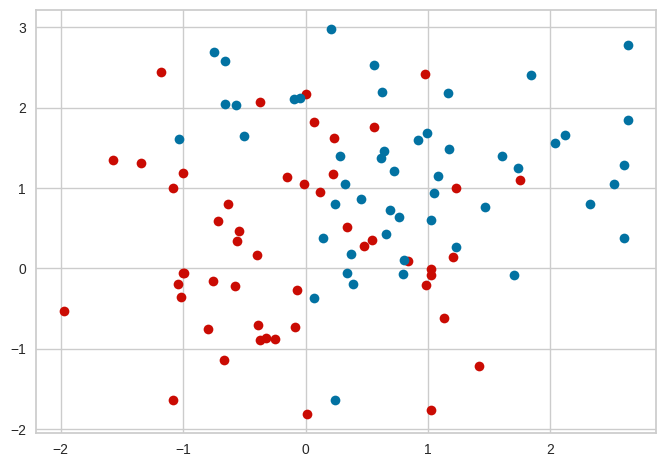

In [ ]:
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

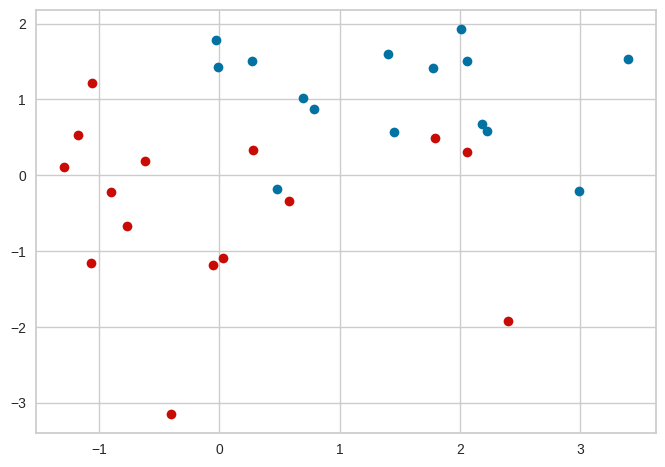

In [ ]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()

In [ ]:
## TASK - 3
## The code given below is that of a KNN classifier, provided by Scikit-learn.
## The parameter 'metric' includes various distance metric options, including those
## we learnt above- manhattan, euclidean, minkowski,chebyshev, hamming, etc.

## Try out different metrics and observe changes in the accuracy, if any. Don't change value of 'k'
## Also, experiment with different metrics and observe if they are applicable for this kind of data.
## If there are any additional parameters needed, for instance, 'p' in case of Minkowski distance, include them.

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(pts, tgts)
our_predictions = knn.predict(test_pts)
print("Prediction Accuracy: ")
print(100 * np.mean(our_predictions == test_tgts))

Prediction Accuracy: 
76.66666666666667


### **SECTION - 2.2: KNN on a Real World dataset**

The Iris flower data set or Fisher's Iris data set is a multivariate data set that consists of 50 samples from each of three species of Iris (*Iris setosa, Iris virginica and Iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0              5.100             3.500              1.400             0.200       0
1              4.900             3.000              1.400             0.200       0
2              4.700             3.200              1.300             0.200       0
3              4.600             3.100              1.500             0.200       0
4              5.000             3.600              1.400             0.200       0
5              5.400             3.900              1.700             0.400       0
6              4.600             3.400              1.400             0.300       0
7              5.000             3.400              1.500             0.200       0
8              4.400             2.900              1.400             0.200       0
9              4.900             3.100              1.500             0.100       0

In [ ]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

In [ ]:
def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)

In [ ]:
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)

In [ ]:
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)

In [ ]:
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)

In [ ]:
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



---
### Questions to Think About and Answer:

1. How are similarity and distance different from each other?  

2. Are there any conditions for a particular distance to be considered a "distance metric"?




### Useful Resources for further reading
1.   [Analytics Vidhya: Distance metrics](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)
2.   [Scikit learn distance metric documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

